# Quality Classification of Germinated Oil Palm Seeds Based on Deep Learning Models

**Group 6:**

1.   Kelly Tan Kai Ling (20310184)
2.   Lisa Ho Yen Xin (20297507)
3.   Tan En Xuan (20297487)

# [1] Pre-requisite

## [1.1] Add shortcut to drive

Access our shared Google Drive folder:  https://bit.ly/G6_COMP3029



## [1.2] Mount Google Drive

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/G6_COMP3029
!ls

Mounted at /content/drive/
/content/drive/My Drive/G6_COMP3029
 AugmentedDataset	       Batch_2		   LightBox	       '(old) AugmentedDataset'
'(backup) G6_COMP3029.ipynb'   Batch_3		   Model	       '(old) G6_COMP3029.ipynb'
 Batch_1		       G6_COMP3029.ipynb   NormalRoomLighting   seedsegment


## [1.3] Import Packages

**Model 1 (w/o Augmentation)**

In [ ]:
import os
import pandas as pd
import cv2
import csv
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision import models
from torch.utils.data import Dataset
import time
import math
import matplotlib.pyplot as plt
import numpy as np

**Model 2 (w/ Augmentation)**

In [ ]:
%matplotlib inline

from __future__ import print_function
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from PIL import Image
from tqdm import tqdm

# [2] Model 1 (w/o Augmentation)

## [2.1] Pre-processing

### [2.1.1] Image Cropping
Crop images from Batch 2 & Batch 3 into individual oil palm seed image

**Batch 2**

In [ ]:
# Function to crop and resize images from batch 2
def crop_and_resize_image_batch2(image_path, x_min, y_min, x_max, y_max, label, output_size, save_dir, good_counter, bad_counter):
    # Load image
    print(f"Loading image: {image_path}")
    image = cv2.imread(image_path)

    # Convert the bounding box coordinates to integers
    x_min, y_min, x_max, y_max = map(int, [x_min, y_min, x_max, y_max])

    # Calculate the dimensions of the square
    size = max(x_max - x_min, y_max - y_min)
    x_center = (x_max + x_min) // 2
    y_center = (y_max + y_min) // 2
    x_min_new = x_center - size // 2
    y_min_new = y_center - size // 2
    x_max_new = x_center + size // 2
    y_max_new = y_center + size // 2

    # Crop the object from the image
    image_cropped = image[y_min_new:y_max_new, x_min_new:x_max_new]

    # Resize the cropped image into 256 x 256
    image_resized = cv2.resize(image_cropped, output_size)

    # Save the cropped object with the appropriate label and original image name
    if label == "GOOD":
        filename = f"{save_dir}/GoodSeed/goodseed{good_counter}.jpg"
        good_counter += 1
    elif label == "BAD":
        filename = f"{save_dir}/BadSeed/badseed{bad_counter}.jpg"
        bad_counter += 1
    else:
        print("Label not found.")
        return

    cv2.imwrite(filename, image_resized)

    print(f"Saved: {filename}")
    print()
    return good_counter, bad_counter

In [ ]:
# Cropped images for Batch 2 are saved in "G6_COMP3029/Batch_2/cropped_images"
'''
# Set the directory for the output of saved images
save_dir = "/content/drive/My Drive/G6_COMP3029/Batch_2/cropped_images"
output_size = (256, 256)

# Load csv file
with open('/content/drive/My Drive/G6_COMP3029/Batch_2/NormalRoomLight_annotation.csv', 'r') as f:
    csv_reader = csv.reader(f)
    next(csv_reader)  # Skip header row

    # Initialize counters
    good_counter = 0
    bad_counter = 0

    for i, row in enumerate(csv_reader):
        image_path, x_min, y_min, x_max, y_max, label = row
        image_path = image_path.replace('/content/drive/My Drive/AAR/dataset', '/content/drive/MyDrive/G6_COMP3029').replace('.jpg', '.JPG')
        good_counter, bad_counter = crop_and_resize_image_batch2(image_path, x_min, y_min, x_max, y_max, label, output_size, save_dir, good_counter, bad_counter)

print(f"Number of good seed images: {good_counter}")
print(f"Number of bad seed images: {bad_counter}")
'''

'\n# Set the directory for the output of saved images\nsave_dir = "/content/drive/My Drive/G6_COMP3029/Batch_2/cropped_images"\noutput_size = (256, 256)\n\n# Load csv file\nwith open(\'/content/drive/My Drive/G6_COMP3029/Batch_2/NormalRoomLight_annotation.csv\', \'r\') as f:\n    csv_reader = csv.reader(f)\n    next(csv_reader)  # Skip header row\n\n    # Initialize counters\n    good_counter = 0\n    bad_counter = 0\n\n    for i, row in enumerate(csv_reader):\n        image_path, x_min, y_min, x_max, y_max, label = row\n        image_path = image_path.replace(\'/content/drive/My Drive/AAR/dataset\', \'/content/drive/MyDrive/G6_COMP3029\').replace(\'.jpg\', \'.JPG\')\n        good_counter, bad_counter = crop_and_resize_image_batch2(image_path, x_min, y_min, x_max, y_max, label, output_size, save_dir, good_counter, bad_counter)\n\nprint(f"Number of good seed images: {good_counter}")\nprint(f"Number of bad seed images: {bad_counter}")\n'

**Batch 3**

In [ ]:
# Function to crop and resize images from batch 2
def crop_and_resize_image_batch3(image_path, x_min, y_min, x_max, y_max, label, output_size, save_dir, good_counter, bad_counter):
    # Load image
    print(f"Loading image: {image_path}")
    image = cv2.imread(image_path)

    # Convert the bounding box coordinates to integers
    x_min, y_min, x_max, y_max = map(int, [x_min, y_min, x_max, y_max])

    # Calculate the dimensions of the square
    size = max(x_max - x_min, y_max - y_min)
    x_center = (x_max + x_min) // 2
    y_center = (y_max + y_min) // 2
    x_min_new = x_center - size // 2
    y_min_new = y_center - size // 2
    x_max_new = x_center + size // 2
    y_max_new = y_center + size // 2

    if x_min_new < 0:
      x_max_new += abs(x_min_new)
      x_min_new = 0
    if y_min_new < 0:
      y_max_new += abs(y_min_new)
      y_min_new = 0

    # Crop the object from the image
    image_cropped = image[y_min_new:y_max_new, x_min_new:x_max_new]

    # Resize the cropped image into 256 x 256
    image_resized = cv2.resize(image_cropped, output_size)

    # Save the cropped object with the appropriate label and original image name
    if label == "GOOD":
        filename = f"{save_dir}/GoodSeed/goodseed{good_counter}.jpg"
        good_counter += 1
    elif label == "BAD":
        filename = f"{save_dir}/BadSeed/badseed{bad_counter}.jpg"
        bad_counter += 1
    else:
        print("Label not found.")
        return

    cv2.imwrite(filename, image_resized)

    print(f"Saved: {filename}")
    print()
    return good_counter, bad_counter

In [ ]:
# Cropped images for Batch 3 are saved in "G6_COMP3029/Batch_3/cropped_images"
'''
# Set the directory for the output of saved images
save_dir = "/content/drive/My Drive/G6_COMP3029/Batch_3/cropped_images"
output_size = (256, 256)

# Load csv file
with open('/content/drive/My Drive/G6_COMP3029/Batch_3/LightBox_annotation.csv', 'r') as f:
    csv_reader = csv.reader(f)
    next(csv_reader)  # Skip header row

    # Initialize counters
    good_counter = 0
    bad_counter = 0

    for i, row in enumerate(csv_reader):
        image_path, x_min, y_min, x_max, y_max, label = row
        image_path = image_path.replace('/content/drive/My Drive/AAR/dataset', '/content/drive/MyDrive/G6_COMP3029').replace('.jpg', '.JPG')
        good_counter, bad_counter = crop_and_resize_image_batch3(image_path, x_min, y_min, x_max, y_max, label, output_size, save_dir, good_counter, bad_counter)

print(f"Number of good seed images: {good_counter}")
print(f"Number of bad seed images: {bad_counter}")
'''

'\n# Set the directory for the output of saved images\nsave_dir = "/content/drive/My Drive/G6_COMP3029/Batch_3/cropped_images"\noutput_size = (256, 256)\n\n# Load csv file\nwith open(\'/content/drive/My Drive/G6_COMP3029/Batch_3/LightBox_annotation.csv\', \'r\') as f:\n    csv_reader = csv.reader(f)\n    next(csv_reader)  # Skip header row\n\n    # Initialize counters\n    good_counter = 0\n    bad_counter = 0\n\n    for i, row in enumerate(csv_reader):\n        image_path, x_min, y_min, x_max, y_max, label = row\n        image_path = image_path.replace(\'/content/drive/My Drive/AAR/dataset\', \'/content/drive/MyDrive/G6_COMP3029\').replace(\'.jpg\', \'.JPG\')\n        good_counter, bad_counter = crop_and_resize_image_batch3(image_path, x_min, y_min, x_max, y_max, label, output_size, save_dir, good_counter, bad_counter)\n\nprint(f"Number of good seed images: {good_counter}")\nprint(f"Number of bad seed images: {bad_counter}")\n'

### [2.1.2] Dataset Preparation
Create a CSV file that contains the filename of the images and their corresponding labels

**Batch 1**

In [ ]:
'''
# Path to the directory containing the images
base_dir = "/content/drive/My Drive/G6_COMP3029"

# Path to the directory containing the 'GoodSeed' and 'BadSeed' folders
seed_dir_train = os.path.join(base_dir, "seedsegment/train")
seed_dir_test = os.path.join(base_dir, "seedsegment/test")

# List all the files in the 'GoodSeed' and 'BadSeed' folders for train and test
list_good_seeds_train = sorted(os.listdir(os.path.join(seed_dir_train, 'GoodSeed')))
list_bad_seeds_train = sorted(os.listdir(os.path.join(seed_dir_train, 'BadSeed')))

list_good_seeds_test = sorted(os.listdir(os.path.join(seed_dir_test, 'GoodSeed')))
list_bad_seeds_test = sorted(os.listdir(os.path.join(seed_dir_test, 'BadSeed')))

# Create a DataFrame with the image names and labels for training
data_train = []
for filename in list_good_seeds_train:
    data_train.append({'image_name': filename, 'label': 1})

for filename in list_bad_seeds_train:
    data_train.append({'image_name': filename, 'label': 0})

# Load dataset into a pandas DataFrame
data_train_df = pd.DataFrame(data_train)

# Create a DataFrame with the image names and labels for testing
data_test = []
for filename in list_good_seeds_test:
    data_test.append({'image_name': filename, 'label': 1})

for filename in list_bad_seeds_test:
    data_test.append({'image_name': filename, 'label': 0})

# Load dataset into a pandas DataFrame
data_test_df = pd.DataFrame(data_test)
'''

'\n# Path to the directory containing the images\nbase_dir = "/content/drive/My Drive/G6_COMP3029"\n\n# Path to the directory containing the \'GoodSeed\' and \'BadSeed\' folders\nseed_dir_train = os.path.join(base_dir, "seedsegment/train")\nseed_dir_test = os.path.join(base_dir, "seedsegment/test")\n\n# List all the files in the \'GoodSeed\' and \'BadSeed\' folders for train and test\nlist_good_seeds_train = sorted(os.listdir(os.path.join(seed_dir_train, \'GoodSeed\')))\nlist_bad_seeds_train = sorted(os.listdir(os.path.join(seed_dir_train, \'BadSeed\')))\n\nlist_good_seeds_test = sorted(os.listdir(os.path.join(seed_dir_test, \'GoodSeed\')))\nlist_bad_seeds_test = sorted(os.listdir(os.path.join(seed_dir_test, \'BadSeed\')))\n\n# Create a DataFrame with the image names and labels for training\ndata_train = []\nfor filename in list_good_seeds_train:\n    data_train.append({\'image_name\': filename, \'label\': 1})\n\nfor filename in list_bad_seeds_train:\n    data_train.append({\'image_nam

In [ ]:
# CSV file for Batch 1 (Train) are saved in "G6_COMP3029/Batch_1/train/data_train.csv"
# CSV file for Batch 1 (Test) are saved in "G6_COMP3029/Batch_1/test/data_test.csv"
'''
# Save the DataFrames to CSV files
csv_path_train = os.path.join(base_dir, 'Batch_1/train','data_train.csv')
csv_path_test = os.path.join(base_dir, 'Batch_1/test', 'data_test.csv')
data_train_df.to_csv(csv_path_train, index=False)
data_test_df.to_csv(csv_path_test, index=False)

print("CSV files saved at:", csv_path_train, csv_path_test)
'''

'\n# Save the DataFrames to CSV files\ncsv_path_train = os.path.join(base_dir, \'Batch_1/train\',\'data_train.csv\')\ncsv_path_test = os.path.join(base_dir, \'Batch_1/test\', \'data_test.csv\')\ndata_train_df.to_csv(csv_path_train, index=False)\ndata_test_df.to_csv(csv_path_test, index=False)\n\nprint("CSV files saved at:", csv_path_train, csv_path_test)\n'

**Batch 2**

In [ ]:
'''
# Path to the directory containing the images
base2_dir = "/content/drive/My Drive/G6_COMP3029/Batch_2"

# List all the files in the 'GoodSeed' and 'BadSeed' folders
list_good_seeds = sorted(os.listdir(os.path.join(base2_dir, 'cropped_images/GoodSeed')))
list_bad_seeds = sorted(os.listdir(os.path.join(base2_dir, 'cropped_images/BadSeed')))

# Create a DataFrame with the image names and labels
data_batch2 = []
for filename in list_good_seeds:
    data_batch2.append({'image_name': filename, 'label': 1})

for filename in list_bad_seeds:
    data_batch2.append({'image_name': filename, 'label': 0})

# Load dataset into a pandas DataFrame
data_batch2_df = pd.DataFrame(data_batch2)
'''

'\n# Path to the directory containing the images\nbase2_dir = "/content/drive/My Drive/G6_COMP3029/Batch_2"\n\n# List all the files in the \'GoodSeed\' and \'BadSeed\' folders\nlist_good_seeds = sorted(os.listdir(os.path.join(base2_dir, \'cropped_images/GoodSeed\')))\nlist_bad_seeds = sorted(os.listdir(os.path.join(base2_dir, \'cropped_images/BadSeed\')))\n\n# Create a DataFrame with the image names and labels\ndata_batch2 = []\nfor filename in list_good_seeds:\n    data_batch2.append({\'image_name\': filename, \'label\': 1})\n\nfor filename in list_bad_seeds:\n    data_batch2.append({\'image_name\': filename, \'label\': 0})\n\n# Load dataset into a pandas DataFrame\ndata_batch2_df = pd.DataFrame(data_batch2)\n'

In [ ]:
# CSV file for Batch 2 are saved in "G6_COMP3029/Batch_3/data_batch2.csv"
'''
# Save the DataFrames to CSV files
csv_path = os.path.join(base2_dir, 'data_batch2.csv')
data_batch2_df.to_csv(csv_path, index=False)

print("CSV file saved at:", csv_path)
'''

'\n# Save the DataFrames to CSV files\ncsv_path = os.path.join(base2_dir, \'data_batch2.csv\')\ndata_batch2_df.to_csv(csv_path, index=False)\n\nprint("CSV file saved at:", csv_path)\n'

**Batch 3**

In [ ]:
'''
# Path to the directory containing the images
base3_dir = "/content/drive/My Drive/G6_COMP3029/Batch_3"

# List all the files in the 'GoodSeed' and 'BadSeed' folders
list_good_seeds = sorted(os.listdir(os.path.join(base3_dir, 'cropped_images/GoodSeed')))
list_bad_seeds = sorted(os.listdir(os.path.join(base3_dir, 'cropped_images/BadSeed')))

# Create a DataFrame with the image names and labels
data_batch3 = []
for filename in list_good_seeds:
    data_batch3.append({'image_name': filename, 'label': 1})

for filename in list_bad_seeds:
    data_batch3.append({'image_name': filename, 'label': 0})

# Load dataset into a pandas DataFrame
data_batch3_df = pd.DataFrame(data_batch3)
'''

'\n# Path to the directory containing the images\nbase3_dir = "/content/drive/My Drive/G6_COMP3029/Batch_3"\n\n# List all the files in the \'GoodSeed\' and \'BadSeed\' folders\nlist_good_seeds = sorted(os.listdir(os.path.join(base3_dir, \'cropped_images/GoodSeed\')))\nlist_bad_seeds = sorted(os.listdir(os.path.join(base3_dir, \'cropped_images/BadSeed\')))\n\n# Create a DataFrame with the image names and labels\ndata_batch3 = []\nfor filename in list_good_seeds:\n    data_batch3.append({\'image_name\': filename, \'label\': 1})\n\nfor filename in list_bad_seeds:\n    data_batch3.append({\'image_name\': filename, \'label\': 0})\n\n# Load dataset into a pandas DataFrame\ndata_batch3_df = pd.DataFrame(data_batch3)\n'

In [ ]:
# CSV file for Batch 3 are saved in "G6_COMP3029/Batch_3/data_batch3.csv"
'''
# Save the DataFrames to CSV files
csv_path = os.path.join(base3_dir, 'data_batch3.csv')
data_batch3_df.to_csv(csv_path, index=False)

print("CSV file saved at:", csv_path)
'''

'\n# Save the DataFrames to CSV files\ncsv_path = os.path.join(base3_dir, \'data_batch3.csv\')\ndata_batch3_df.to_csv(csv_path, index=False)\n\nprint("CSV file saved at:", csv_path)\n'

### [2.1.3] Split Dataset
Split Train/ Valid dataset from Batch 1 `train` folder

**Batch 1**

In [ ]:
# Load dataset into a pandas DataFrame
data_train_df = pd.read_csv('Batch_1/train/data_train.csv')

# Split the training DataFrame into two parts: train and validation
train_df, val_df = train_test_split(data_train_df, test_size=0.2, random_state=42)

In [ ]:
# Calculate total number of samples in the original dataset
total_samples = len(train_df) + len(val_df)

# Calculate number of samples in each split
num_samples_train = len(train_df)
num_samples_val = len(val_df)

# Calculate sizes of the splits as a percentage of the original dataset
percent_train = (num_samples_train / total_samples) * 100
percent_val = (num_samples_val / total_samples) * 100

# Print the results in a clearer and cleaner way
print("Dataset Summary:")
print(f"Total number of samples: {total_samples}")
print(f"Number of samples in the training split: {num_samples_train}")
print(f"Number of samples in the validation split: {num_samples_val}")
print("\nSplit Sizes:")
print(f"Training split size: {percent_train:.2f}% of total")
print(f"Validation split size: {percent_val:.2f}% of total")

Dataset Summary:
Total number of samples: 1752
Number of samples in the training split: 1401
Number of samples in the validation split: 351

Split Sizes:
Training split size: 79.97% of total
Validation split size: 20.03% of total


### [2.1.4] Data Transformation



In [ ]:
# Define transformations
input_size = 224
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Function to load and preprocess data
def tf_data_loader(df, root_dir, transform):
    dataset = []
    for idx, row in df.iterrows():
        img_path = os.path.join(root_dir, row['image_name'])

        image = cv2.imread(img_path)
        if image is None:
            print(f"Error reading image: {img_path}")

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = transform(image)
        dataset.append((image, row['label']))
    return dataset

def load_dataset(df, root_dir, preprocess):
    print(f'Loading datasets from {root_dir}...')
    dataset_good = tf_data_loader(df[df['label'] == 1], os.path.join(root_dir, 'GoodSeed'), preprocess)
    dataset_bad = tf_data_loader(df[df['label'] == 0], os.path.join(root_dir, 'BadSeed'), preprocess)
    dataset = dataset_good + dataset_bad
    print(f'Datasets from {root_dir} loaded!')
    return dataset

### [2.1.5] Load Dataset

In [ ]:
# Path to the directory containing the images
base_dir = "/content/drive/My Drive/G6_COMP3029"

# Load dataset into a pandas DataFrame
data_test_df = pd.read_csv('Batch_1/test/data_test.csv')

**Batch 1**

In [ ]:
# Load datasets for training, validation, and testing
train_dataset = load_dataset(train_df, os.path.join(base_dir, "seedsegment/train"), preprocess)
val_dataset = load_dataset(val_df, os.path.join(base_dir, "seedsegment/train"), preprocess)
test_dataset = load_dataset(data_test_df, os.path.join(base_dir, "seedsegment/test"), preprocess)

# Create DataLoader instances
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# Print dataset sizes
print(f'Training dataset size: {len(train_dataset)}')
print(f'Validation dataset size: {len(val_dataset)}')
print(f'Testing dataset size: {len(test_dataset)}')


Loading datasets from /content/drive/My Drive/G6_COMP3029/seedsegment/train...
Datasets from /content/drive/My Drive/G6_COMP3029/seedsegment/train loaded!
Loading datasets from /content/drive/My Drive/G6_COMP3029/seedsegment/train...
Datasets from /content/drive/My Drive/G6_COMP3029/seedsegment/train loaded!
Loading datasets from /content/drive/My Drive/G6_COMP3029/seedsegment/test...
Datasets from /content/drive/My Drive/G6_COMP3029/seedsegment/test loaded!
Training dataset size: 1401
Validation dataset size: 351
Testing dataset size: 401


**Batch 2**

In [ ]:
# Path to the directory containing the images
base2_dir = "/content/drive/My Drive/G6_COMP3029/Batch_2"

# Load dataset into a pandas DataFrame
data_batch2_df = pd.read_csv('Batch_2/data_batch2.csv')

# Load dataset for testing
batch2_dataset = load_dataset(data_batch2_df, os.path.join(base2_dir, "cropped_images"), preprocess)

# Create DataLoader instance
batch_size = 64
batch2_loader = DataLoader(batch2_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

print(f'Batch 2 dataset size: {len(batch2_dataset)}')

Loading datasets from /content/drive/My Drive/G6_COMP3029/Batch_2/cropped_images...
Datasets from /content/drive/My Drive/G6_COMP3029/Batch_2/cropped_images loaded!
Batch 2 dataset size: 900


**Batch 3**

In [ ]:
# Path to the directory containing the images
base3_dir = "/content/drive/My Drive/G6_COMP3029/Batch_3"

# Load dataset into a pandas DataFrame
data_batch3_df = pd.read_csv('Batch_3/data_batch3.csv')

# Load dataset for testing
batch3_dataset = load_dataset(data_batch3_df, os.path.join(base3_dir, "cropped_images"), preprocess)

# Create DataLoader instance
batch_size = 64
batch3_loader = DataLoader(batch3_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

print(f'Batch 3 dataset size: {len(batch3_dataset)}')

Loading datasets from /content/drive/My Drive/G6_COMP3029/Batch_3/cropped_images...
Datasets from /content/drive/My Drive/G6_COMP3029/Batch_3/cropped_images loaded!
Batch 3 dataset size: 1198


## [2.2] CNN Architecture
Fine tuning ResNet-18 model. Define loss function and optimiser function

In [ ]:
# Define the CNN architecture
class CNN_Model(torch.nn.Module):
    def __init__(self):
        super(CNN_Model, self).__init__()
        self.backbone = models.resnet18(pretrained=True)
        self.backbone.fc = nn.Linear(in_features=512, out_features=512)
        self.fc1 = nn.Linear(in_features=512, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=2)


        # initialize weights

    def forward(self, x):
        x = self.backbone(x)
        x = torch.nn.functional.relu(x)
        x = self.fc1(x)
        x = torch.nn.functional.relu(x)
        x = self.fc2(x)
        return torch.nn.functional.log_softmax(x,dim=1)

In [ ]:
# Initialize the model and optimizer
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = CNN_Model().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-6)
for param in model.backbone.parameters():
    param.requires_grad = False

for param in model.backbone.fc.parameters():
  param.requires_grad = True

for param in model.backbone.layer4.parameters():
  param.requires_grad = True

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 152MB/s]


## [2.3] Training Process

### [2.3.1] Train Model
Train ResNet-18 model using the Batch 1 dataset.

In [ ]:
# Compute training and validation Loss in each epoch
def compute_accuracy(model,data_source):
    model.eval()
    data_loss = 0
    correct = 0
    for data in data_source:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)   # Cross Entropy Loss
        data_loss += loss.item()
        correct += (predicted == labels).sum().item()
    final_loss = data_loss / len(data_source)
    final_acc = 100 * correct / len(data_source.dataset)
    return final_loss , final_acc

# Compute accuracy for each class
def compute_accuracy_by_class(model, data_source):
    model.eval()
    good_seeds_correct = 0
    bad_seeds_correct = 0
    total_good_seeds = 0
    total_bad_seeds = 0

    for data in data_source:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        # Calculate accuracy for good seeds
        good_seeds_correct += ((predicted == 1) & (labels == 1)).sum().item()
        total_good_seeds += (labels == 1).sum().item()

        # Calculate accuracy for bad seeds
        bad_seeds_correct += ((predicted == 0) & (labels == 0)).sum().item()
        total_bad_seeds += (labels == 0).sum().item()

    # Calculate accuracy for each class
    if total_good_seeds != 0:
        accuracy_good_seeds = 100 * good_seeds_correct / total_good_seeds
    else:
        accuracy_good_seeds = 0.0

    if total_bad_seeds != 0:
        accuracy_bad_seeds = 100 * bad_seeds_correct / total_bad_seeds
    else:
        accuracy_bad_seeds = 0.0

    return accuracy_good_seeds, accuracy_bad_seeds

In [ ]:
start = time.time()
epoch_n = 30

training_loss = []
validation_loss = []
training_accuracy = []
validation_accuracy = []

# Train the model
for epoch in range(epoch_n):
    running_training_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    avg_training_loss, result_training_accuracy = compute_accuracy(model, train_loader)
    training_loss.append(avg_training_loss)
    training_accuracy.append(result_training_accuracy)

    avg_validation_loss, result_validation_accuracy = compute_accuracy(model, val_loader)
    validation_loss.append(avg_validation_loss)
    validation_accuracy.append(result_validation_accuracy)

    print(f"\n--- [Epoch {epoch + 1}] ---")
    print(f"[Training] Loss: {avg_training_loss:.4f}, Accuracy: {result_training_accuracy:.2f}%")
    print(f"[Validation] Loss: {avg_validation_loss:.4f}, Accuracy: {result_validation_accuracy:.2f}%")

end = time.time()
time_used = end - start
print("Time used: ", time_used)


--- [Epoch 1] ---
[Training] Loss: 0.3125, Accuracy: 85.30%
[Validation] Loss: 0.3635, Accuracy: 84.62%

--- [Epoch 2] ---
[Training] Loss: 0.1129, Accuracy: 96.15%
[Validation] Loss: 0.2006, Accuracy: 91.45%

--- [Epoch 3] ---
[Training] Loss: 0.0403, Accuracy: 98.36%
[Validation] Loss: 0.1474, Accuracy: 94.02%

--- [Epoch 4] ---
[Training] Loss: 0.0062, Accuracy: 99.93%
[Validation] Loss: 0.1648, Accuracy: 94.59%

--- [Epoch 5] ---
[Training] Loss: 0.0022, Accuracy: 100.00%
[Validation] Loss: 0.1817, Accuracy: 94.59%

--- [Epoch 6] ---
[Training] Loss: 0.0600, Accuracy: 99.07%
[Validation] Loss: 0.2043, Accuracy: 92.59%

--- [Epoch 7] ---
[Training] Loss: 0.0124, Accuracy: 99.50%
[Validation] Loss: 0.3046, Accuracy: 92.59%

--- [Epoch 8] ---
[Training] Loss: 0.0002, Accuracy: 100.00%
[Validation] Loss: 0.2146, Accuracy: 94.87%

--- [Epoch 9] ---
[Training] Loss: 0.0002, Accuracy: 100.00%
[Validation] Loss: 0.1807, Accuracy: 94.30%

--- [Epoch 10] ---
[Training] Loss: 0.0001, Accurac

### [2.3.2] Save Trained Model
The trained weights will be as `model.pt`.

In [ ]:
torch.save(model, "/content/drive/My Drive/G6_COMP3029/Model/model.pt")

### [2.3.3] Training Results
Compute loss, accuracy and output graph for training and validation.

**Average Metrics**

In [ ]:
# Print average metrics
print("Model v1 (w/o Augmentation)")
print("Average Training Loss:", sum(training_loss) / len(training_loss))
print("Average Validation Loss:", sum(validation_loss) / len(validation_loss))
print("Average Training Accuracy:", sum(training_accuracy) / len(training_accuracy))
print("Average Validation Accuracy:", sum(validation_accuracy) / len(validation_accuracy))

Model v1 (w/o Augmentation)
Average Training Loss: 0.01825255245099138
Average Validation Loss: 0.22577619728197332
Average Training Accuracy: 99.27670711396622
Average Validation Accuracy: 93.96961063627737


**Output Graphs**

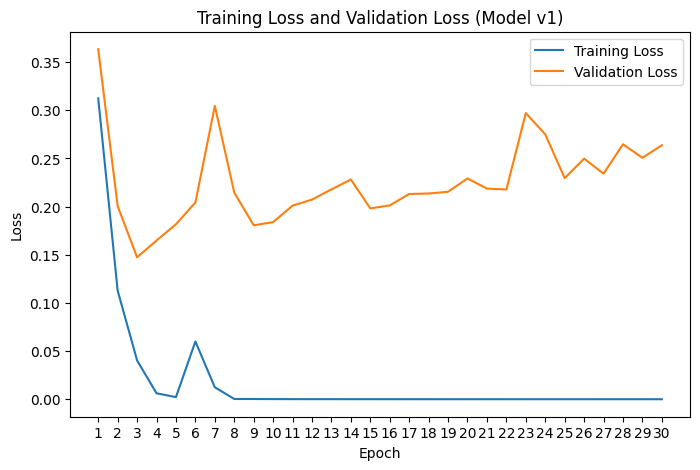

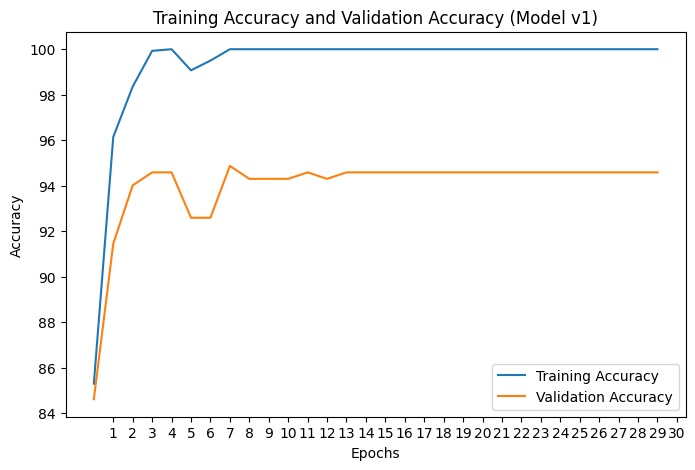

In [ ]:
# Training loss and validation loss over the number of epochs graph
plt.figure(figsize=(8,5))
x_axis = range(1, epoch_n + 1)
plt.plot(x_axis, training_loss, label='Training Loss')
plt.plot(x_axis, validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss and Validation Loss (Model v1)')
plt.xticks(x_axis, range(1, epoch_n + 1))
plt.legend()
plt.show()

print()

# Training accuracy and validation accuracy over the number of epochs graph
plt.figure(figsize=(8,5))
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy and Validation Accuracy (Model v1)')
plt.xticks(x_axis, range(1, epoch_n + 1))
plt.legend()
plt.show()

## [2.4] Test

### [2.4.1] Test Results

**Batch 1**

In [ ]:
# Compute testing loss and accuracy for batch 1 (model v1)
avg_loss_batch1 , accuracy_batch1  = compute_accuracy(model, test_loader)
print("Model v1 (Batch 1)")
print("Testing Loss: ", avg_loss_batch1)
print("Testing Accuracy: ", accuracy_batch1 )

Model v1 (Batch 1)
Testing Loss:  0.24876725021749735
Testing Accuracy:  93.76558603491272


In [ ]:
# Compute accuracy for each class in batch 1 (model v1)
accuracy_good_seeds_batch1, accuracy_bad_seeds_batch1 = compute_accuracy_by_class(model, test_loader)
print("Accuracy (Good Seed): ", accuracy_good_seeds_batch1 )
print("Accuracy (Bad Seed): ", accuracy_bad_seeds_batch1 )

Accuracy (Good Seed):  92.53731343283582
Accuracy (Bad Seed):  95.0


**Batch 2**

In [ ]:
# Compute testing loss and accuracy for batch 2 (model v1)
avg_loss_batch2 , accuracy_batch2  = compute_accuracy(model, batch2_loader)
print("Model v1 (Batch 2)")
print("Testing Loss: ", avg_loss_batch2)
print("Testing Accuracy: ", accuracy_batch2 )

Model v1 (Batch 2)
Testing Loss:  0.9542782107988993
Testing Accuracy:  82.66666666666667


In [ ]:
# Compute accuracy for each class in batch 2 (model v1)
accuracy_good_seeds_batch2, accuracy_bad_seeds_batch2 = compute_accuracy_by_class(model, batch2_loader)
print("Accuracy (Good Seed): ", accuracy_good_seeds_batch2 )
print("Accuracy (Bad Seed): ", accuracy_bad_seeds_batch2 )

Accuracy (Good Seed):  82.88888888888889
Accuracy (Bad Seed):  82.44444444444444


**Batch 3**

In [ ]:
# Compute testing loss and accuracy for batch 3 (model v1)
avg_loss_batch3 , accuracy_batch3 = compute_accuracy(model, batch3_loader)
print("Model v1 (Batch 3)")
print("Testing Loss: ", avg_loss_batch3)
print("Testing Accuracy: ", accuracy_batch3)

Model v1 (Batch 3)
Testing Loss:  1.7647667558569657
Testing Accuracy:  74.79131886477462


In [ ]:
# Compute accuracy for each class in batch 2 (model v1)
accuracy_good_seeds_batch3, accuracy_bad_seeds_batch3 = compute_accuracy_by_class(model, batch3_loader)
print("Accuracy (Good Seed): ", accuracy_good_seeds_batch3 )
print("Accuracy (Bad Seed): ", accuracy_bad_seeds_batch3 )

Accuracy (Good Seed):  61.65289256198347
Accuracy (Bad Seed):  88.1956155143339


**Average Result**

In [ ]:
# Calculate the total loss and accuracy
total_loss = avg_loss_batch1 + avg_loss_batch2 + avg_loss_batch3
total_accuracy = accuracy_batch1 + accuracy_batch2 + accuracy_batch3

# Calculate the average loss and accuracy
avg_testing_loss = total_loss / 3
avg_testing_accuracy = total_accuracy / 3

# Print the average test results
print("Average Testing Loss (Model v1): ", avg_testing_loss)
print("Average Testing Accuracy (Model v1): ", avg_testing_accuracy)

Average Testing Loss (Model v1):  0.9892707389577874
Average Testing Accuracy (Model v1):  83.741190522118


In [ ]:
# Calculate the average accuracy
avg_bad = (accuracy_bad_seeds_batch1 + accuracy_bad_seeds_batch2 + accuracy_bad_seeds_batch3) / 3
avg_good = (accuracy_good_seeds_batch1 + accuracy_good_seeds_batch2 + accuracy_good_seeds_batch3) / 3

# Print the average accuracy
print("Average Accuracy (Good Seed): ", avg_bad)
print("Average Accuracy (Bad Seed): ", avg_good)

Average Accuracy (Good Seed):  88.54668665292611
Average Accuracy (Bad Seed):  79.02636496123606


### [2.4.2] Output Metrics

**Batch 1**

In [ ]:
# Initialize variables
TruePositives = 0
TrueNegatives = 0
FalsePositives = 0
FalseNegatives = 0

# Set the model to evaluation mode
model.eval()

# Loop through the test dataset and use the trained model to make predictions
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        for i in range(len(predicted)):
            if predicted[i] == labels[i] == 1:
                TruePositives += 1
            elif predicted[i] == labels[i] == 0:
                TrueNegatives += 1
            elif predicted[i] != labels[i] and predicted[i] == 1:
                FalsePositives += 1
            elif predicted[i] != labels[i] and predicted[i] == 0:
                FalseNegatives += 1

# Calculate precision, recall, f1 score, and accuracy
precision = TruePositives / (TruePositives + FalsePositives)
recall = TruePositives / (TruePositives + FalseNegatives)
f1_score = 2 * (precision * recall) / (precision + recall)
accuracy = (TruePositives + TrueNegatives) / (TruePositives + TrueNegatives + FalsePositives + FalseNegatives)

# Save the output metrics to a CSV file using Pandas
output_metrics = pd.DataFrame({'Precision': [precision],
                               'Recall': [recall],
                               'F1-score': [f1_score],
                               'Accuracy': [accuracy]})

print(f'Precision (Batch 1): {precision:.6f}')
print(f'Recall (Batch 1): {recall:.6f}')
print(f'F1-score (Batch 1): {f1_score:.6f}')
print(f'Accuracy (Batch 1): {accuracy:.6f}')

Precision (Batch 1): 0.948980
Recall (Batch 1): 0.925373
F1-score (Batch 1): 0.937028
Accuracy (Batch 1): 0.937656


**Batch 2**

In [ ]:
# Initialize variables
TruePositives = 0
TrueNegatives = 0
FalsePositives = 0
FalseNegatives = 0

# Set the model to evaluation mode
model.eval()

# Loop through the test dataset and use the trained model to make predictions
with torch.no_grad():
    for data in batch2_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        for i in range(len(predicted)):
            if predicted[i] == labels[i] == 1:
                TruePositives += 1
            elif predicted[i] == labels[i] == 0:
                TrueNegatives += 1
            elif predicted[i] != labels[i] and predicted[i] == 1:
                FalsePositives += 1
            elif predicted[i] != labels[i] and predicted[i] == 0:
                FalseNegatives += 1

# Calculate precision, recall, f1 score, and accuracy
precision = TruePositives / (TruePositives + FalsePositives)
recall = TruePositives / (TruePositives + FalseNegatives)
f1_score = 2 * (precision * recall) / (precision + recall)
accuracy = (TruePositives + TrueNegatives) / (TruePositives + TrueNegatives + FalsePositives + FalseNegatives)

# Save the output metrics to a CSV file using Pandas
output_metrics = pd.DataFrame({'Precision': [precision],
                               'Recall': [recall],
                               'F1-score': [f1_score],
                               'Accuracy': [accuracy]})

print(f'Precision (Batch 2): {precision:.6f}')
print(f'Recall (Batch 2): {recall:.6f}')
print(f'F1-score (Batch 2): {f1_score:.6f}')
print(f'Accuracy (Batch 2): {accuracy:.6f}')

Precision (Batch 2): 0.825221
Recall (Batch 2): 0.828889
F1-score (Batch 2): 0.827051
Accuracy (Batch 2): 0.826667


**Batch 3**

In [ ]:
# Initialize variables
TruePositives = 0
TrueNegatives = 0
FalsePositives = 0
FalseNegatives = 0

# Set the model to evaluation mode
model.eval()

# Loop through the test dataset and use the trained model to make predictions
with torch.no_grad():
    for data in batch3_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        for i in range(len(predicted)):
            if predicted[i] == labels[i] == 1:
                TruePositives += 1
            elif predicted[i] == labels[i] == 0:
                TrueNegatives += 1
            elif predicted[i] != labels[i] and predicted[i] == 1:
                FalsePositives += 1
            elif predicted[i] != labels[i] and predicted[i] == 0:
                FalseNegatives += 1

# Calculate precision, recall, f1 score, and accuracy
precision = TruePositives / (TruePositives + FalsePositives)
recall = TruePositives / (TruePositives + FalseNegatives)
f1_score = 2 * (precision * recall) / (precision + recall)
accuracy = (TruePositives + TrueNegatives) / (TruePositives + TrueNegatives + FalsePositives + FalseNegatives)

# Save the output metrics to a CSV file using Pandas
output_metrics = pd.DataFrame({'Precision': [precision],
                               'Recall': [recall],
                               'F1-score': [f1_score],
                               'Accuracy': [accuracy]})

print(f'Precision (Batch 3): {precision:.6f}')
print(f'Recall (Batch 3): {recall:.6f}')
print(f'F1-score (Batch 3): {f1_score:.6f}')
print(f'Accuracy (Batch 3): {accuracy:.6f}')

Precision (Batch 3): 0.841986
Recall (Batch 3): 0.616529
F1-score (Batch 3): 0.711832
Accuracy (Batch 3): 0.747913


## [2.5] Load Saved Model

In [ ]:
# Run [3] CNN Architecture to load CNN_Model first
# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model
PATH = "/content/drive/My Drive/G6_COMP3029/Model/model.pt"
model = torch.load(PATH, map_location=device)
print(model)

CNN_Model(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_

## [2.6] Data Visualisation

### [2.6.1] Initialisation

In [ ]:
model_weights = [] # to save the conv layer weights in this list
conv_layers = [] # to save the 49 conv layers in this list

# Get all the model children as a list
counter = 0
model_children_1 = list(model.backbone.children())
for i in range(len(model_children_1)):
    if type(model_children_1[i]) == torch.nn.Conv2d:
        counter += 1
        model_weights.append(model_children_1[i].weight)
        conv_layers.append(model_children_1[i])

    if type(model_children_1[i]) == torch.nn.Sequential:
        model_children_2 = list(model_children_1[i].children())
        for j in range(len(model_children_2)):
            model_children_3 = list(model_children_2[j].children())
            for k in range(len(model_children_3)):
                if type(model_children_3[k]) == torch.nn.Conv2d:
                    counter += 1
                    model_weights.append(model_children_3[k].weight)
                    conv_layers.append(model_children_3[k])


print(f"Total convolutional layers (Model v1): {counter}")
print(conv_layers)

Total convolutional layers (Model v1): 17
[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False), Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False), Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False

### [2.6.2] Visualise Filter

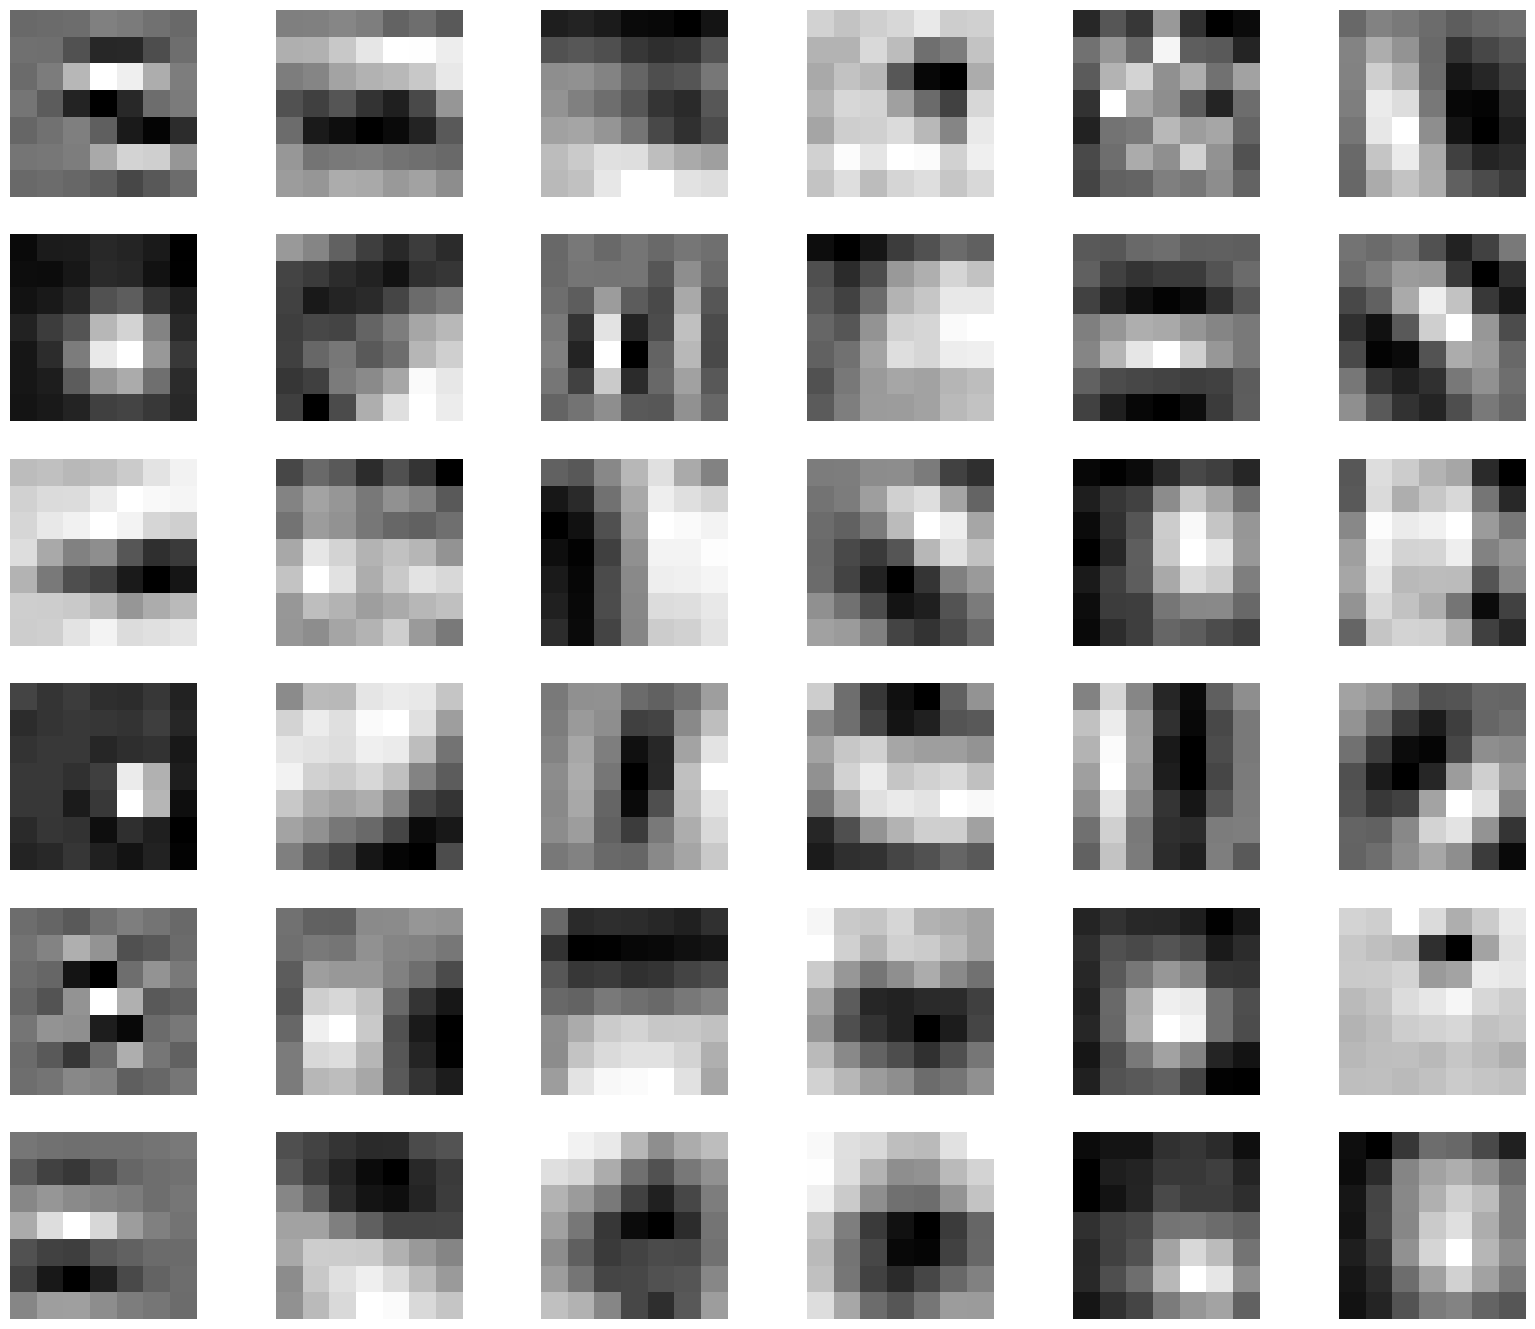

In [ ]:
# Visualize Filters for Model v1
plt.figure(figsize=(20, 17))
for i, filter in enumerate(model_weights[0]):
    if i == 36: # we will visualise only 8x8 blocks from each layer
            break
    plt.subplot(6, 6, i+1) # (8, 8) because in conv0 we have 7x7 filters and total of 64 (see printed shapes)
    plt.imshow(filter[0, :, :].cpu().detach(), cmap='gray')
    plt.axis('off')
plt.show()

### [2.6.3] Feature Mapping

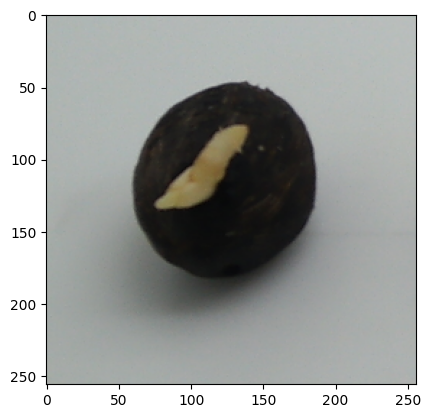

torch.Size([3, 256, 256])
torch.Size([1, 3, 256, 256])


In [ ]:
# Batch 1
img = cv2.imread('/content/drive/My Drive/G6_COMP3029/seedsegment/test/GoodSeed/goodtest0.png')

# Batch 2
# img = cv2.imread('/content/drive/My Drive/G6_COMP3029/Batch_2/cropped_images/GoodSeed/goodseed0.jpg')

# Batch 3
# img = cv2.imread('/content/drive/My Drive/G6_COMP3029/Batch_3/cropped_images/GoodSeed/goodseed70.jpg')

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # convert BGR to RGB
seed = img
plt.imshow(img)
plt.show()
transform = transforms.Compose([
    transforms.ToTensor(),
])
img = np.array(img)

# apply the transformations
img = transform(img)
print(img.size())
# unsqueeze to add a batch dimension
img = img.unsqueeze(0)
print(img.size())
img=img.to(device)

In [ ]:
# Pass the image through all the layers
results = [conv_layers[0](img)]
for i in range(1, len(conv_layers)):
    # pass the result from the last layer to the next layer
    results.append(conv_layers[i](results[-1]))

# Make a copy of the `results`
outputs = results

# Visualise 36 features from each layer
for num_layer in range(len(outputs)):
    plt.figure(figsize=(30, 30))
    layer_viz = outputs[num_layer][0, :, :, :]
    layer_viz = layer_viz.data
    print(layer_viz.size())
    for i, filter in enumerate(layer_viz):
        if i == 36: # we will visualise only 8x8 blocks from each layer
            break
        plt.subplot(6, 6, i + 1)
        plt.imshow(filter.cpu(), cmap='gray')
        plt.axis("off")
    print(f"Saving layer {num_layer} feature maps...")

    plt.close()

torch.Size([64, 128, 128])
Saving layer 0 feature maps...
torch.Size([64, 128, 128])
Saving layer 1 feature maps...
torch.Size([64, 128, 128])
Saving layer 2 feature maps...
torch.Size([64, 128, 128])
Saving layer 3 feature maps...
torch.Size([64, 128, 128])
Saving layer 4 feature maps...
torch.Size([128, 64, 64])
Saving layer 5 feature maps...
torch.Size([128, 64, 64])
Saving layer 6 feature maps...
torch.Size([128, 64, 64])
Saving layer 7 feature maps...
torch.Size([128, 64, 64])
Saving layer 8 feature maps...
torch.Size([256, 32, 32])
Saving layer 9 feature maps...
torch.Size([256, 32, 32])
Saving layer 10 feature maps...
torch.Size([256, 32, 32])
Saving layer 11 feature maps...
torch.Size([256, 32, 32])
Saving layer 12 feature maps...
torch.Size([512, 16, 16])
Saving layer 13 feature maps...
torch.Size([512, 16, 16])
Saving layer 14 feature maps...
torch.Size([512, 16, 16])
Saving layer 15 feature maps...
torch.Size([512, 16, 16])
Saving layer 16 feature maps...


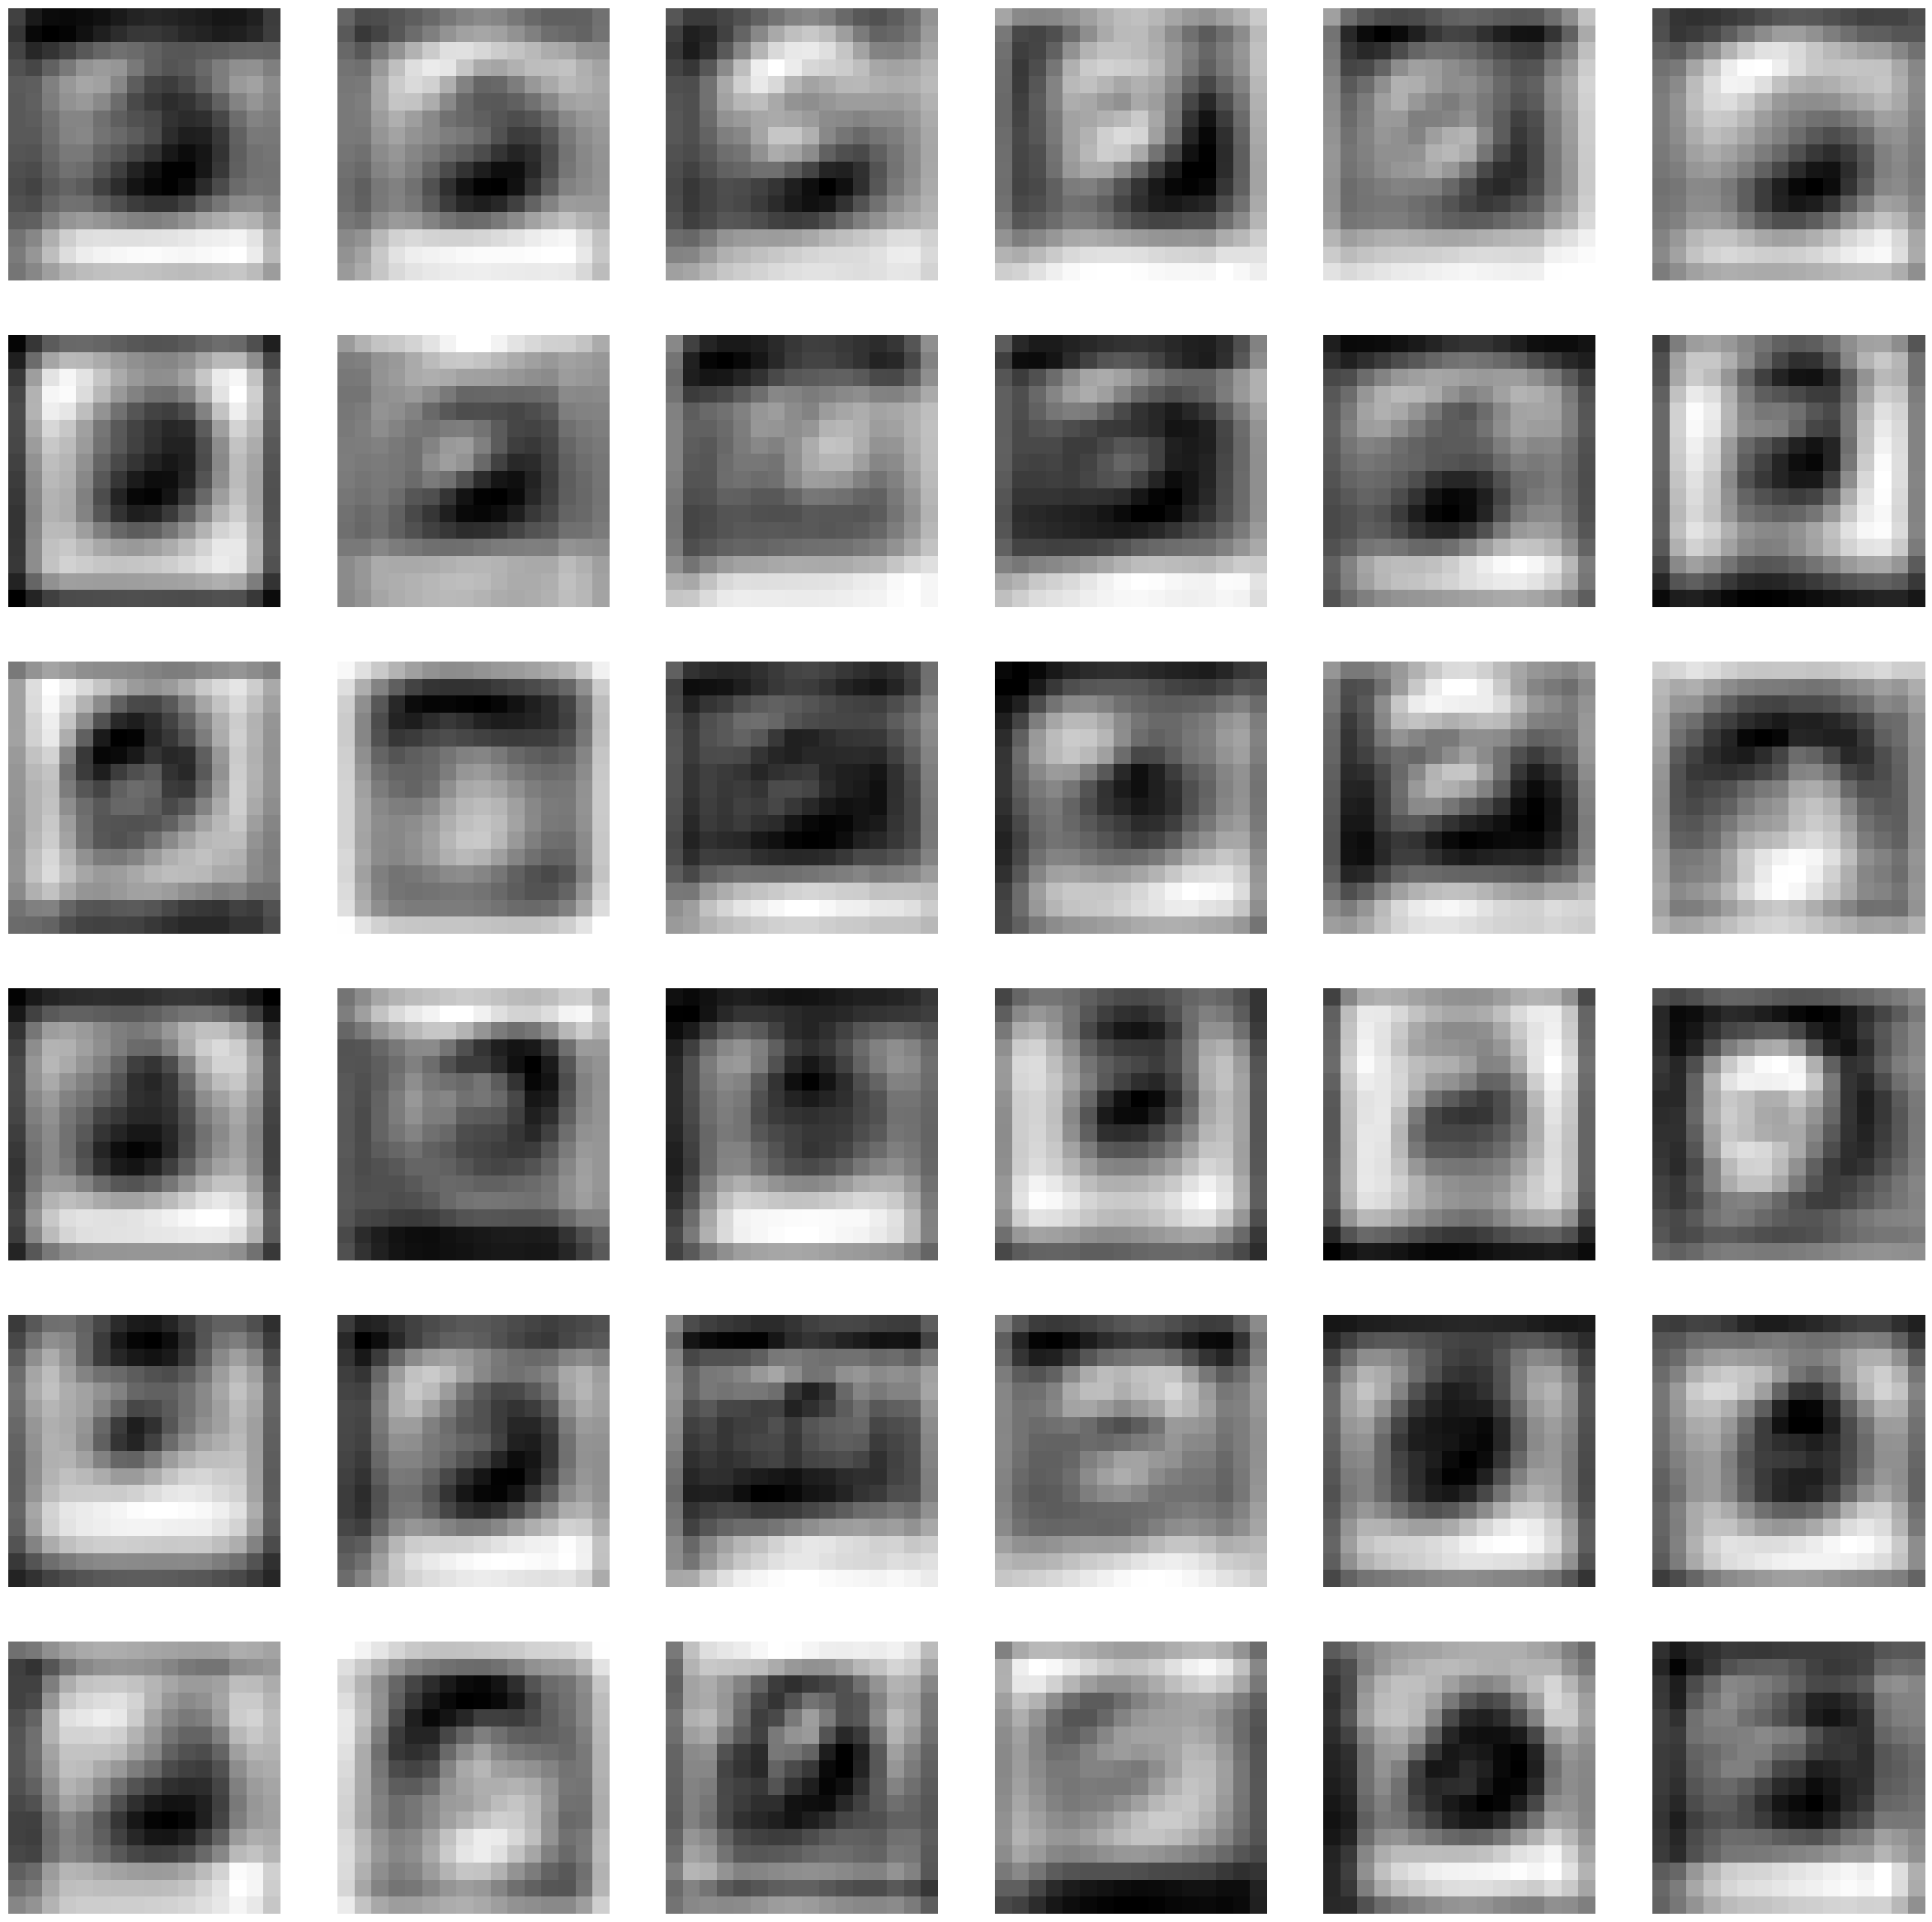

In [ ]:
# Visualise 36 features from each layer
def display_layer(num_layer):
    plt.figure(figsize=(30, 30))
    layer_viz = outputs[num_layer][0, :, :, :]
    layer_viz = layer_viz.data
    for i, filter in enumerate(layer_viz):
        if i == 36: # we will visualise only 8x8 blocks from each layer
            break
        plt.subplot(6, 6, i + 1)
        plt.imshow(filter, cmap='gray')
        plt.axis("off")

    plt.show()
    plt.close()

# Display feature maps of a specific layer (e.g., layer 3)
display_layer(16) # can only run on CPU (not GPU)

### [2.6.4] Saliency Map

In [ ]:
# Preprocess the image
def preprocess(image, size=256):
    transform = transforms.Compose([
        transforms.ToPILImage(mode=None),
        transforms.Resize((size,size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        transforms.Lambda(lambda x: x[None]),
    ])
    return transform(image)

def deprocess(image):
    transform = transforms.Compose([
        transforms.Lambda(lambda x: x[0]),
        transforms.Normalize(mean=[0, 0, 0], std=[4.3668, 4.4643, 4.4444]),
        transforms.Normalize(mean=[-0.485, -0.456, -0.406], std=[1, 1, 1]),
        transforms.ToPILImage(),
    ])
    return transform(image)

def show_img(PIL_IMG):
    plt.imshow(np.asarray(PIL_IMG))

# Saliency Map for Model v1
def saliency_map(img):

    X = preprocess(img)
    model.eval()
    X.requires_grad_()
    scores = model(X.to(device))
    score_max_index = scores.argmax()
    score_max = scores[0,score_max_index]
    score_max.backward()
    saliency, _ = torch.max(X.grad.data.abs(),dim=1)

    plt.figure(figsize=(10,15))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(saliency[0], cmap=plt.cm.hot)
    plt.axis("off")
    plt.show()

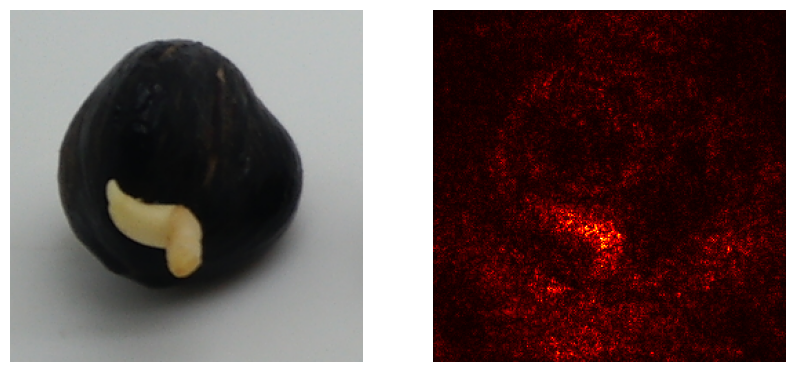

In [ ]:
# Saliency map for good seed in train folder
img = cv2.imread('/content/drive/My Drive/G6_COMP3029/seedsegment/train/GoodSeed/goodtrain0.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # convert BGR to RGB
seed = img
saliency_map(seed)

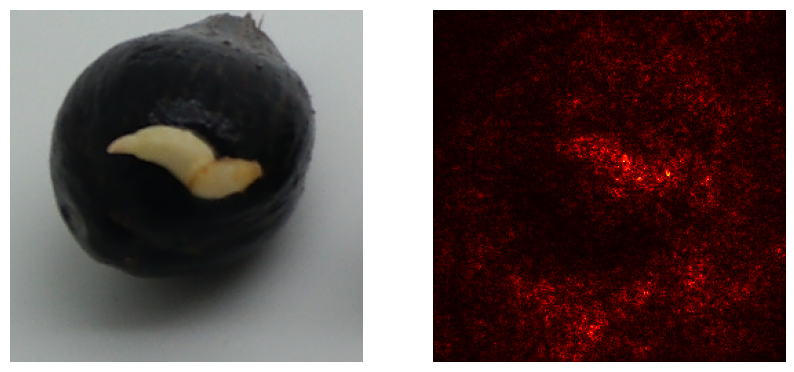

In [ ]:
# Saliency map for good seed in test folder
img = cv2.imread('/content/drive/My Drive/G6_COMP3029/seedsegment/test/GoodSeed/goodtest30.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # convert BGR to RGB
seed = img
saliency_map(seed)

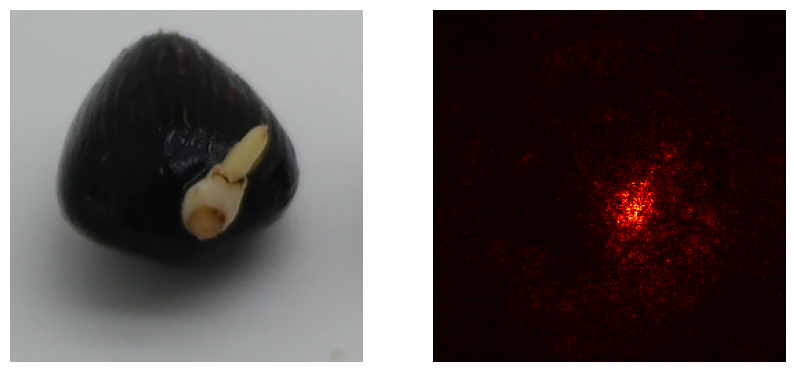

In [ ]:
# Saliency map for bad seed in train folder
img = cv2.imread('/content/drive/My Drive/G6_COMP3029/seedsegment/train/BadSeed/badtrain20.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # convert BGR to RGB
seed = img
saliency_map(seed)

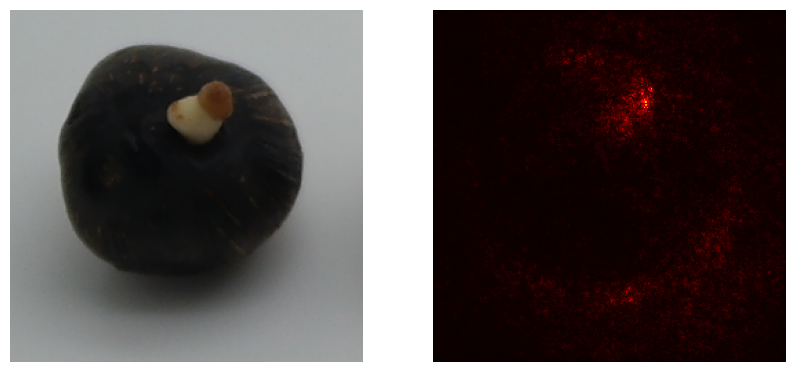

In [ ]:
# Saliency map for bad seed in test folder
img = cv2.imread('/content/drive/My Drive/G6_COMP3029/seedsegment/test/BadSeed/badtest0.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # convert BGR to RGB
seed = img
saliency_map(seed)

### [2.6.5] Visualise Wrongly Classified Images

**Finding & Storing Misclassified**

In [ ]:
misclassified_indices = []
misclassified_images = []
misclassified_labels = []
misclassified_predictions = []

with torch.no_grad():
    for i, data in enumerate(test_loader):
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        for j in range(len(predicted)):
            if predicted[j] != labels[j]:
                misclassified_indices.append(i * test_loader.batch_size + j)
                misclassified_images.append(images[j].cpu().numpy())
                misclassified_labels.append(labels[j].cpu().item())
                misclassified_predictions.append(predicted[j].cpu().item())

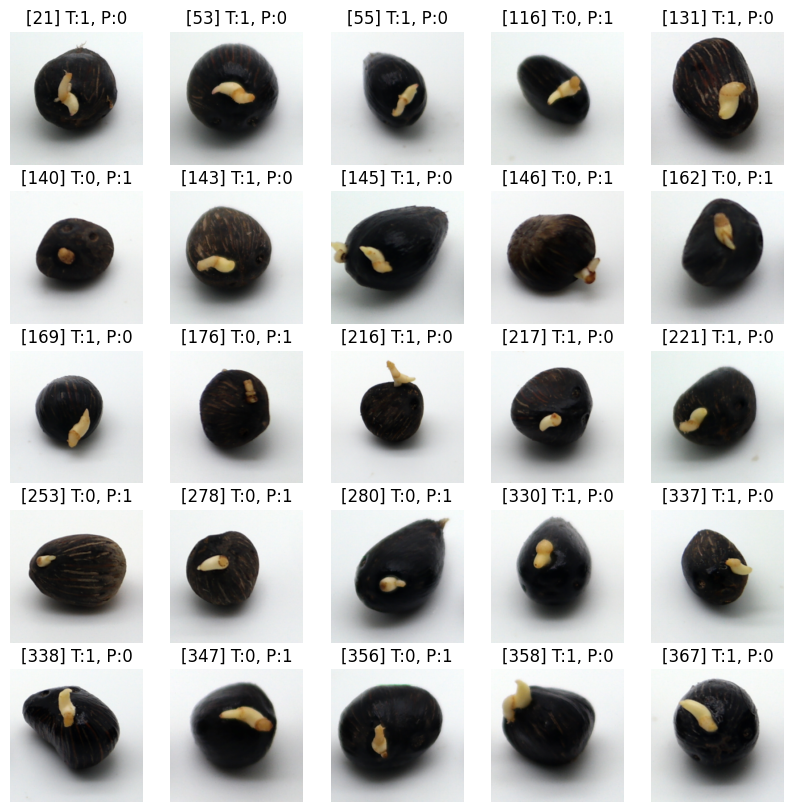

In [ ]:
# Display all mislabelled images, their truth value, and the prediction
# Calculate the grid size
num_images = len(misclassified_images)
num_rows = math.ceil(math.sqrt(num_images))
num_cols = num_rows

# Create a new figure with the calculated size
fig = plt.figure(figsize=(num_rows*2, num_cols*2))

# Loop through all misclassified images and display them in the grid
for i in range(num_images):
    ax = fig.add_subplot(num_rows, num_cols, i+1)
    img = misclassified_images[i].transpose((1, 2, 0))

    # Normalise the image
    img = (img - img.min()) / (img.max() - img.min())
    ax.imshow(img)
    ax.set_title(f"[{misclassified_indices[i]}] T:{misclassified_labels[i]}, P:{misclassified_predictions[i]}")
    ax.axis('off')

plt.show()

**Visualise Last Layer of Feature Map**

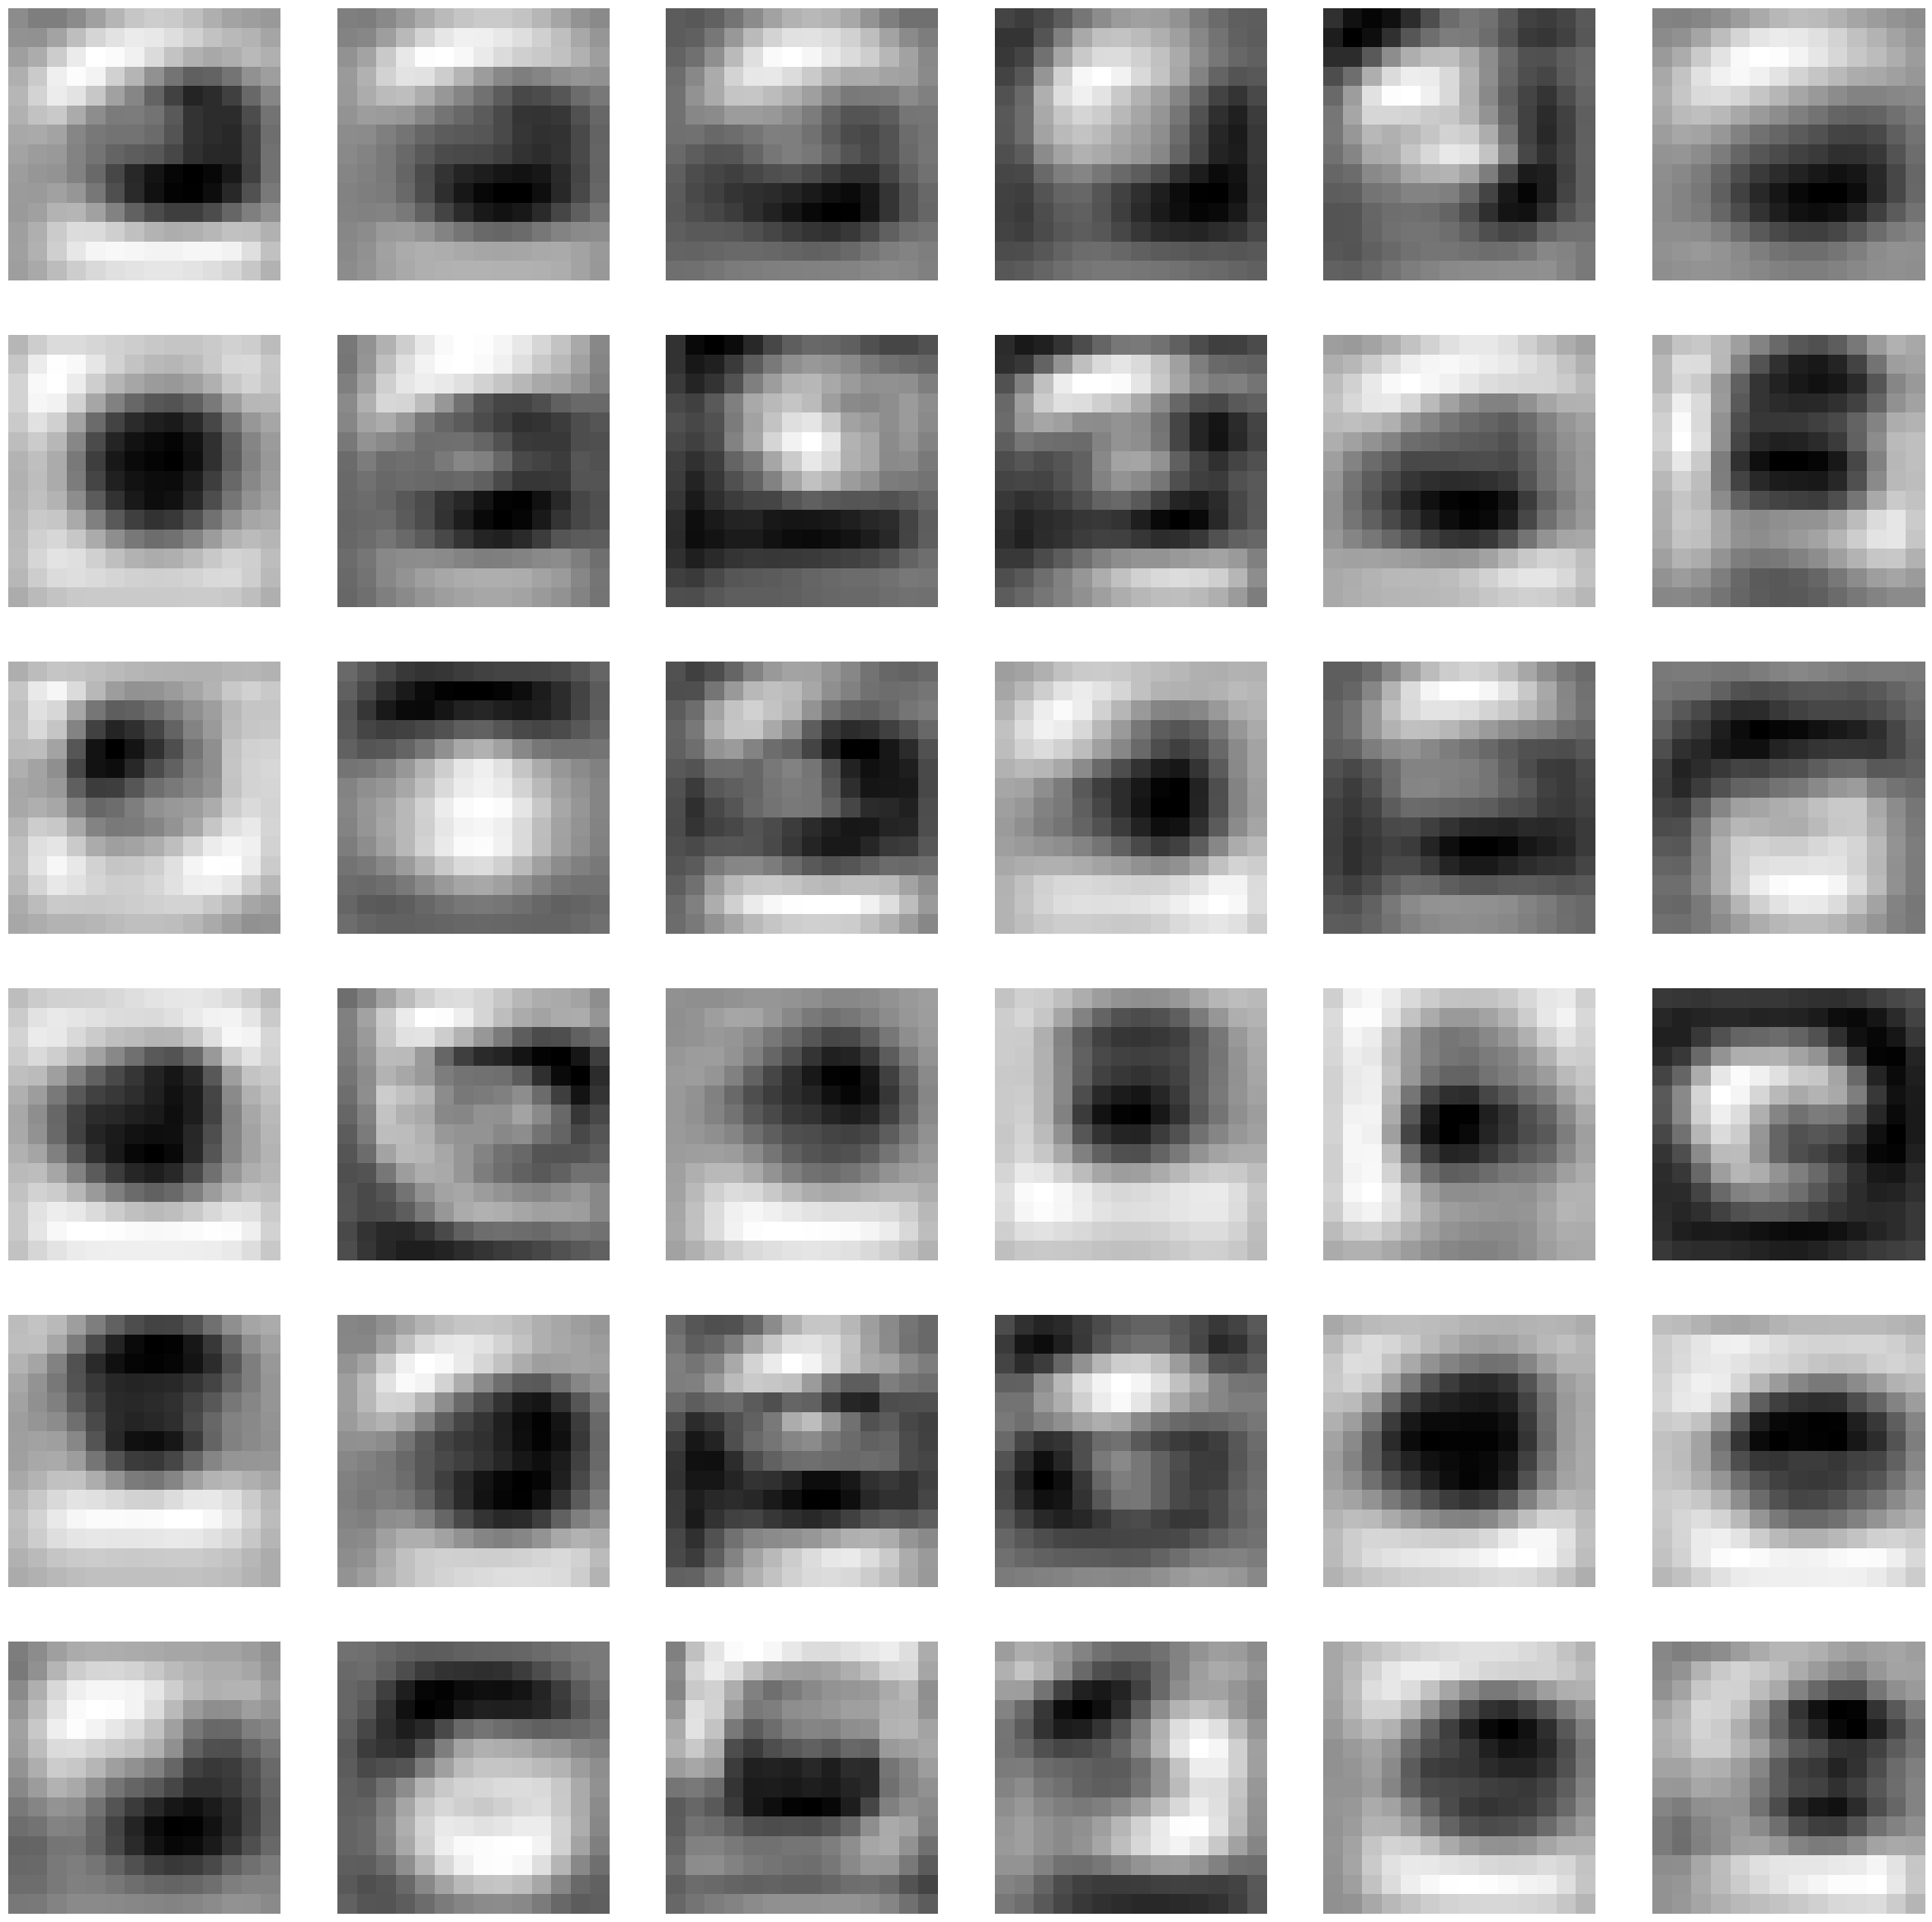

In [ ]:
def display_layer(num_layer, img):
    # Pass the image through all the layers up to the selected layer
    layer_output = img
    for i in range(num_layer + 1):
        layer_output = conv_layers[i](layer_output)

    # Get the feature maps from the selected layer
    layer_viz = layer_output[0, :, :, :].data

    # Calculate the number of rows and columns needed to display the feature maps
    num_maps = layer_viz.shape[0]
    num_rows = int(np.ceil(np.sqrt(num_maps)))
    num_cols = num_rows

    # Visualize the feature maps
    plt.figure(figsize=(30, 30))
    for i, feature_map in enumerate(layer_viz):
        if i == 36: # we will visualize only 8x8 blocks from each layer
            break
        plt.subplot(6, 6, i + 1)
        plt.imshow(feature_map.cpu(), cmap='gray')
        plt.axis("off")

    #plt.savefig('result/TransferModel/Batch_1/False_layer{}_image{}.png'.format(layer_index,image_index))
    plt.show()
    plt.close()

image_index = 15  # index of mislabelled image
layer_index = 16 # index of last conv layer
transform = transforms.Compose([
    transforms.ToTensor(),
])
# Transform the misclassified image to a tensor and unsqueeze to add a batch dimension
misclassified_image = misclassified_images[image_index].transpose((1, 2, 0))
transformed_image = transform(misclassified_image)
transformed_image = transformed_image.unsqueeze(0)
transformed_image = transformed_image.to(device)
display_layer(num_layer=layer_index, img=transformed_image)

**Saliency Map for Wrongly Classified Images**

In [ ]:
# Preprocess the image
def preprocess(image, size=256):
    transform = transforms.Compose([
        transforms.ToPILImage(mode=None),
        transforms.Resize((size,size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        transforms.Lambda(lambda x: x[None]),
    ])
    return transform(image)

def deprocess(image):
    transform = transforms.Compose([
        transforms.Lambda(lambda x: x[0]),
        transforms.Normalize(mean=[0, 0, 0], std=[4.3668, 4.4643, 4.4444]),
        transforms.Normalize(mean=[-0.485, -0.456, -0.406], std=[1, 1, 1]),
        transforms.ToPILImage(),
    ])
    return transform(image)

def show_img(PIL_IMG):
    plt.imshow(np.asarray(PIL_IMG))

def saliency_map(img,image_index):

    # preprocess the image
    X = preprocess(img)

    # we would run the model in evaluation mode
    model.eval()

    # we need to find the gradient with respect to the input image, so we need to call requires_grad_ on it
    X.requires_grad_()
    scores = model(X.to(device))

    # Get the index corresponding to the maximum score and the maximum score itself.
    score_max_index = scores.argmax()
    score_max = scores[0,score_max_index]
    score_max.backward()
    saliency, _ = torch.max(X.grad.data.abs(),dim=1)

    # code to plot the saliency map as a heatmap
    # plt.imshow(saliency[0], cmap=plt.cm.hot)
    # plt.axis('off')

    plt.figure(figsize=(10,15))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(saliency[0], cmap=plt.cm.hot)
    plt.axis("off")
    plt.show()

def convert_img(img):
    img = img / 2 + 0.5     # unnormalize
    img = np.transpose(img, (1, 2, 0))
    norm_image = cv2.normalize(img, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    norm_image = norm_image.astype(np.uint8)
    return norm_image

T:0, P:1


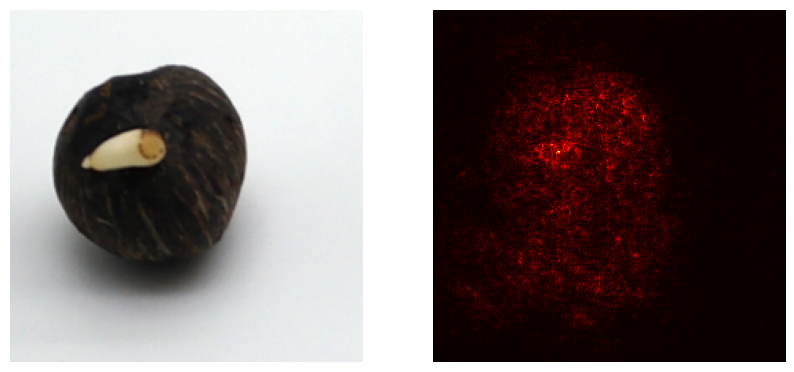

In [ ]:
image_index = 12  # Change this value to display a different mislabelled image
seed = convert_img(misclassified_images[image_index])

print(f"T:{misclassified_labels[image_index]}, P:{misclassified_predictions[image_index]}")
saliency_map(seed,image_index)

T:1, P:0


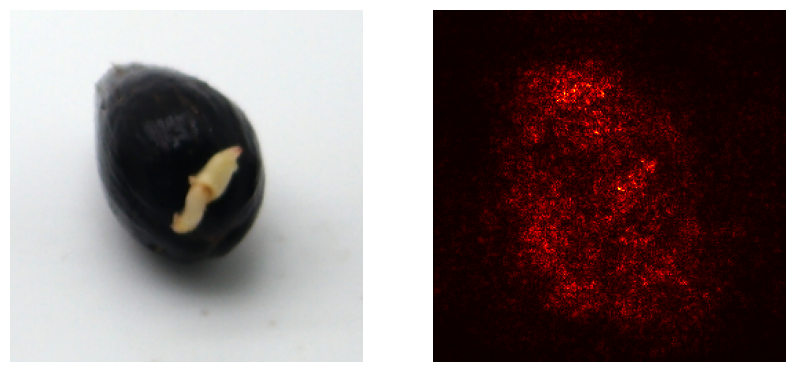

In [ ]:
image_index = 6  # Change this value to display a different mislabelled image
seed = convert_img(misclassified_images[image_index])

print(f"T:{misclassified_labels[image_index]}, P:{misclassified_predictions[image_index]}")
saliency_map(seed,image_index)

# [3] Model 2 (w/ Augmentation)

## [3.1] DCGAN Augmentation
Uses the DCGAN model to generate an augmented dataset from Batch 1 dataset

### [3.1.1] Load Dataset

In [ ]:
# Set random seed for reproducibility
# manualSeed = 999
manualSeed = random.randint(1, 10000)
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  7484


In [ ]:
# Root directory for dataset
augmentroot = "/content/drive/My Drive/G6_COMP3029/AugmentedDataset/"

# Number of workers for dataloader
workers = 2

# Batch size during training
# batch_size = 128

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 30

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

# Transformations for each augmentation
transformations = [
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop(size=image_size),
    transforms.RandomAffine(degrees=45, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=15),
    transforms.RandomPerspective(distortion_scale=0.5, p=0.5),
]

**Load GoodSeed Dataset**

In [ ]:
# Define the root directory of the original dataset
original_root = os.path.join(augmentroot, 'original/GoodSeed')

augmented_datasets = []
# Append the original dataset to the list of augmented datasets
original_dataset = dset.ImageFolder(root=original_root,
                                    transform=transforms.Compose([
                                        transforms.Resize(image_size),
                                        transforms.CenterCrop(image_size),
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                    ]))
augmented_datasets.append(original_dataset)

# Create the augmented datasets and loaders
for idx, transform in enumerate(transformations):
    augmented_dataset = dset.ImageFolder(root=original_root,
                                         transform=transforms.Compose([
                                             transform,
                                             transforms.Resize(image_size),
                                             transforms.CenterCrop(image_size),
                                             transforms.ToTensor(),
                                             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                         ]))
    augmented_datasets.append(augmented_dataset)

# Concatenate the datasets
combined_dataset = torch.utils.data.ConcatDataset(augmented_datasets)
print("Total number of images (original):", len(original_dataset))
print("Total number of images (new):", len(combined_dataset))

# Create the dataloader
goodseed_loader = torch.utils.data.DataLoader(combined_dataset, batch_size=128,
                                              shuffle=True, num_workers=workers)

Total number of images (original): 1102
Total number of images (new): 8816


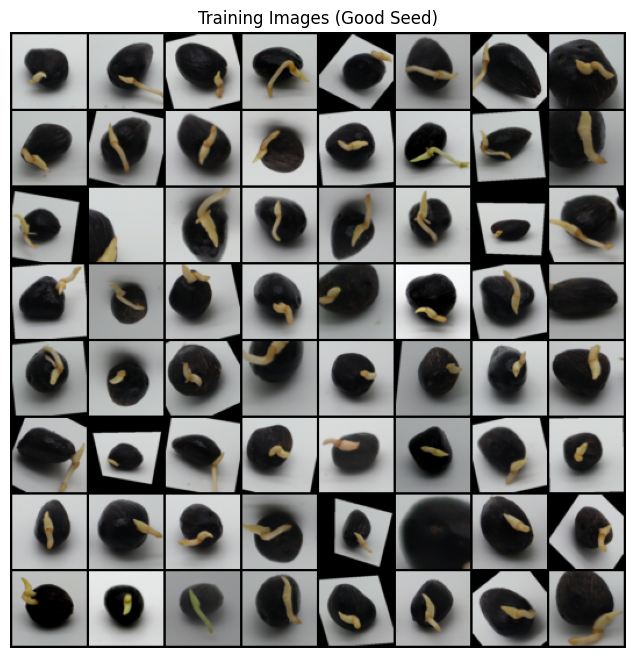

In [ ]:
# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# Plot some training images
real_batch = next(iter(goodseed_loader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images (Good Seed)")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

**Load BadSeed Dataset**

In [ ]:
# Define the root directory of the original dataset
original_root = os.path.join(augmentroot, 'original/BadSeed')

augmented_datasets = []
# Append the original dataset to the list of augmented datasets
original_dataset = dset.ImageFolder(root=original_root,
                                    transform=transforms.Compose([
                                        transforms.Resize(image_size),
                                        transforms.CenterCrop(image_size),
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                    ]))
augmented_datasets.append(original_dataset)

# Create the augmented datasets and loaders
for idx, transform in enumerate(transformations):
    augmented_dataset = dset.ImageFolder(root=original_root,
                                         transform=transforms.Compose([
                                             transform,
                                             transforms.Resize(image_size),
                                             transforms.CenterCrop(image_size),
                                             transforms.ToTensor(),
                                             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                         ]))
    augmented_datasets.append(augmented_dataset)

# Concatenate the datasets
combined_dataset = torch.utils.data.ConcatDataset(augmented_datasets)
print("Total number of images (original):", len(original_dataset))
print("Total number of images (new):", len(combined_dataset))

# Create the dataloader
badseed_loader = torch.utils.data.DataLoader(combined_dataset, batch_size=128,
                                              shuffle=True, num_workers=workers)

Total number of images (original): 1051
Total number of images (new): 8408


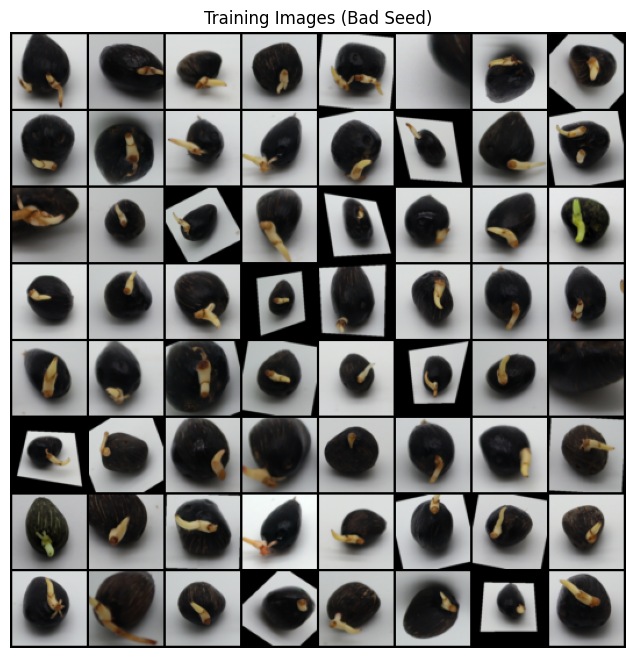

In [ ]:
# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# Plot some training images
real_batch = next(iter(badseed_loader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images (Bad Seed)")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

### [3.1.2] Weight Initialisation

In [ ]:
# custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

### [3.1.3] Generator

In [ ]:
# Generator Code

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        return self.main(input)

In [ ]:
# Create the generator
netG = Generator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.02.
netG.apply(weights_init)

# Print the model
print(netG)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


### [3.1.4] Discriminator

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

In [ ]:
# Create the Discriminator
netD = Discriminator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netD.apply(weights_init)

# Print the model
print(netD)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)


### [3.1.5] Training

In [ ]:
# Initialize BCELoss function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

**Training Dataset (Good Seed)**

In [ ]:
# Training Good Seed

# Lists to keep track of progress
img_list_train_good = []
G_losses_train_good = []
D_losses_train_good = []
iters = 0
output_folder = os.path.join(augmentroot, 'augmented/GoodSeed')

print("Starting Training (Good Seed)...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(goodseed_loader, 0):

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        output = netD(real_cpu).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(noise)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(goodseed_loader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses_train_good.append(errG.item())
        D_losses_train_good.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(goodseed_loader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list_train_good.append(vutils.make_grid(fake, padding=2, normalize=True))

            # # Save generated images
            # for j in range(len(fake)):
            #     image_path = os.path.join(output_folder, f'batch_{i}_image_{j}.png')
            #     vutils.save_image(fake[j], image_path)

        if (epoch == num_epochs-1):
          # Save generated images
          for j in range(len(fake)):
            image_path = os.path.join(output_folder, f'seed_{manualSeed}_image_{j}.png')
            vutils.save_image(fake[j], image_path)
        iters += 1

Starting Training (Good Seed)...
[0/30][0/69]	Loss_D: 0.5340	Loss_G: 2.2414	D(x): 0.7004	D(G(z)): 0.1018 / 0.1577
[0/30][50/69]	Loss_D: 0.3463	Loss_G: 2.8097	D(x): 0.8178	D(G(z)): 0.1121 / 0.0862
[1/30][0/69]	Loss_D: 0.2556	Loss_G: 2.6999	D(x): 0.8631	D(G(z)): 0.0925 / 0.0852
[1/30][50/69]	Loss_D: 0.9319	Loss_G: 2.5410	D(x): 0.8468	D(G(z)): 0.4548 / 0.1066
[2/30][0/69]	Loss_D: 0.4571	Loss_G: 2.8858	D(x): 0.8698	D(G(z)): 0.2541 / 0.0712
[2/30][50/69]	Loss_D: 1.4317	Loss_G: 4.3284	D(x): 0.9651	D(G(z)): 0.7081 / 0.0206
[3/30][0/69]	Loss_D: 0.4194	Loss_G: 3.5074	D(x): 0.9365	D(G(z)): 0.2838 / 0.0383
[3/30][50/69]	Loss_D: 1.6454	Loss_G: 4.9544	D(x): 0.9833	D(G(z)): 0.7499 / 0.0106
[4/30][0/69]	Loss_D: 0.6610	Loss_G: 1.0489	D(x): 0.6105	D(G(z)): 0.0975 / 0.4048
[4/30][50/69]	Loss_D: 0.2040	Loss_G: 3.3030	D(x): 0.9137	D(G(z)): 0.1020 / 0.0485
[5/30][0/69]	Loss_D: 1.0198	Loss_G: 1.5256	D(x): 0.4720	D(G(z)): 0.1117 / 0.2972
[5/30][50/69]	Loss_D: 0.3955	Loss_G: 3.5436	D(x): 0.9158	D(G(z)): 0.244

**Training Dataset (Bad Seed)**

In [ ]:
# Training Bad Seed

# Lists to keep track of progress
img_list_train_bad = []
G_losses_train_bad = []
D_losses_train_bad = []
iters = 0
output_folder = os.path.join(augmentroot, 'augmented/BadSeed')

print("Starting Training (Bad Seed)...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(badseed_loader, 0):

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        output = netD(real_cpu).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(noise)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(badseed_loader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses_train_bad.append(errG.item())
        D_losses_train_bad.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(badseed_loader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list_train_bad.append(vutils.make_grid(fake, padding=2, normalize=True))

            # # Save generated images
            # for j in range(len(fake)):
            #     image_path = os.path.join(output_folder, f'batch_{i}_image_{j}.png')
            #     vutils.save_image(fake[j], image_path)

        if (epoch == num_epochs-1):
          # Save generated images
          for j in range(len(fake)):
            image_path = os.path.join(output_folder, f'seed_{manualSeed}_image_{j}.png')
            vutils.save_image(fake[j], image_path)
        iters += 1

Starting Training (Bad Seed)...
[0/30][0/66]	Loss_D: 0.1325	Loss_G: 9.4047	D(x): 0.9333	D(G(z)): 0.0034 / 0.0001
[0/30][50/66]	Loss_D: 0.1089	Loss_G: 10.4289	D(x): 0.9838	D(G(z)): 0.0822 / 0.0000
[1/30][0/66]	Loss_D: 0.1244	Loss_G: 16.7274	D(x): 0.9877	D(G(z)): 0.0989 / 0.0000
[1/30][50/66]	Loss_D: 4.3113	Loss_G: 31.2888	D(x): 0.9883	D(G(z)): 0.9767 / 0.0000
[2/30][0/66]	Loss_D: 0.1089	Loss_G: 4.4657	D(x): 0.9433	D(G(z)): 0.0110 / 0.0253
[2/30][50/66]	Loss_D: 0.1760	Loss_G: 8.7742	D(x): 0.9332	D(G(z)): 0.0462 / 0.0002
[3/30][0/66]	Loss_D: 0.1685	Loss_G: 7.3844	D(x): 0.9633	D(G(z)): 0.1077 / 0.0010
[3/30][50/66]	Loss_D: 0.6004	Loss_G: 2.4279	D(x): 0.8896	D(G(z)): 0.2573 / 0.1365
[4/30][0/66]	Loss_D: 0.2440	Loss_G: 4.6680	D(x): 0.8669	D(G(z)): 0.0713 / 0.0204
[4/30][50/66]	Loss_D: 0.1186	Loss_G: 9.6832	D(x): 0.9086	D(G(z)): 0.0012 / 0.0001
[5/30][0/66]	Loss_D: 0.1131	Loss_G: 5.1736	D(x): 0.9643	D(G(z)): 0.0548 / 0.0084
[5/30][50/66]	Loss_D: 0.1239	Loss_G: 6.5436	D(x): 0.9627	D(G(z)): 0.0

### [3.1.6] Results

**Training Loss Graph- Training Dataset (Good Seed)**

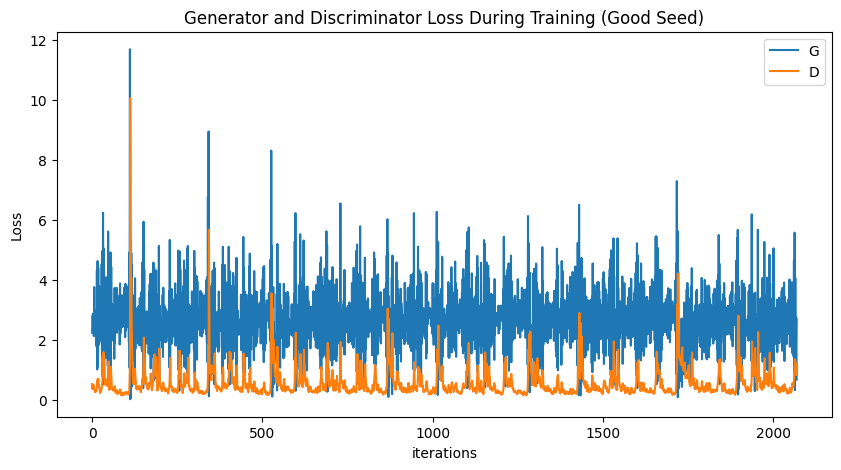

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training (Good Seed)")
plt.plot(G_losses_train_good,label="G")
plt.plot(D_losses_train_good,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Training Loss Graph- Training Dataset (Bad Seed)**

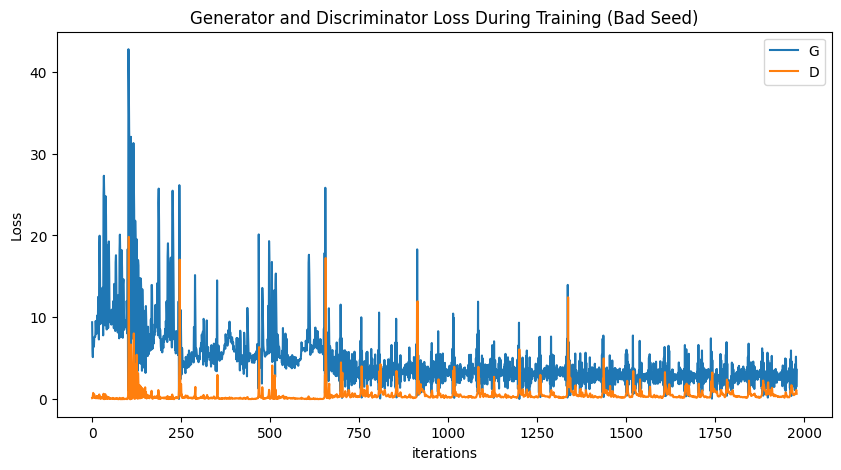

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training (Bad Seed)")
plt.plot(G_losses_train_bad,label="G")
plt.plot(D_losses_train_bad,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Real Images VS Fake Images- Training Dataset (Good Seed)**

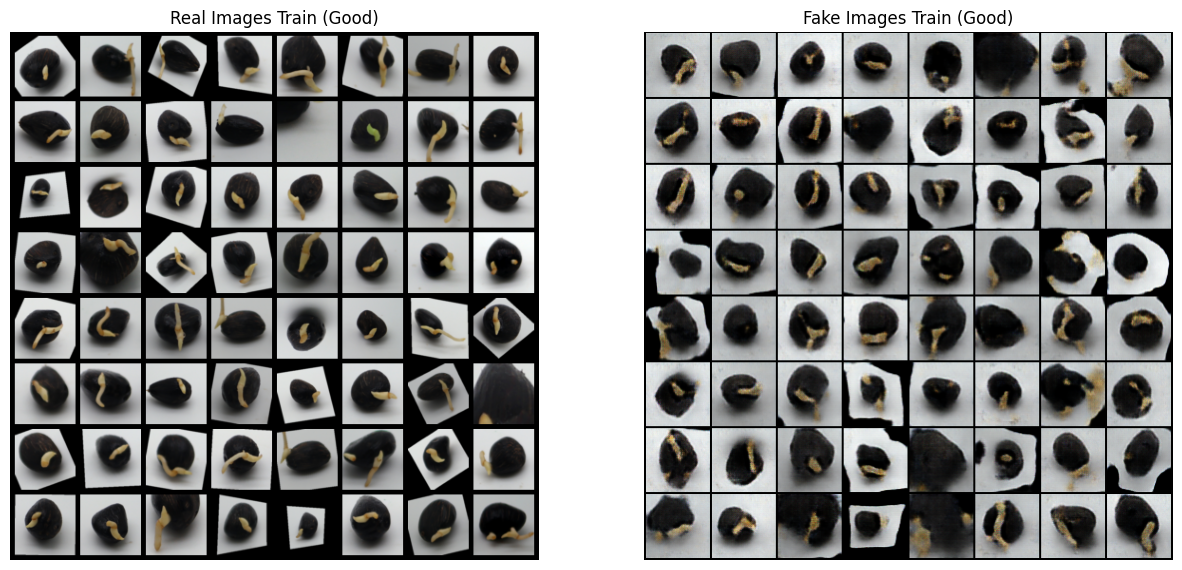

In [ ]:
# Grab a batch of real images from the dataloader
real_batch = next(iter(goodseed_loader))

# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images Train (Good)")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images Train (Good)")
plt.imshow(np.transpose(img_list_train_good[-1],(1,2,0)))
plt.show()

**Real Images VS Fake Images- Training Dataset (Good Seed)**

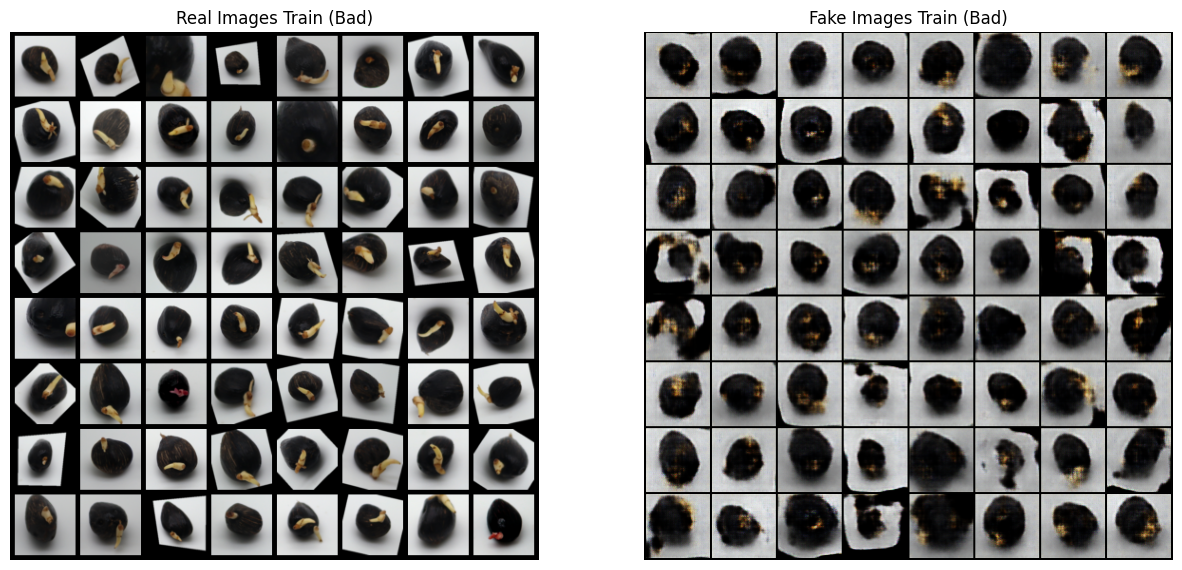

In [ ]:
# Grab a batch of real images from the dataloader
real_batch = next(iter(badseed_loader))

# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images Train (Bad)")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images Train (Bad)")
plt.imshow(np.transpose(img_list_train_bad[-1],(1,2,0)))
plt.show()

## [3.2] Pre-processing

### [3.2.1] Dataset Preparation

In [ ]:
# Path to the directory containing the augmented images
aug_base_dir = "/content/drive/My Drive/G6_COMP3029/AugmentedDataset/augmented"

# List all the files in the 'GoodSeed' and 'BadSeed' folders
list_aug_good_seeds = sorted(os.listdir(os.path.join(aug_base_dir, 'GoodSeed')))
list_aug_bad_seeds= sorted(os.listdir(os.path.join(aug_base_dir, 'BadSeed')))

# Create a DataFrame with the augmented image names and labels
aug_data_good = []
for filename in list_aug_good_seeds:
    aug_data_good.append({'augmented_image_name': filename, 'label': 1})

aug_data_bad = []
for filename in list_aug_bad_seeds:
    aug_data_bad.append({'augmented_image_name': filename, 'label': 0})

# Load dataset into a pandas DataFrame
aug_data_good_df = pd.DataFrame(aug_data_good)
aug_data_bad_df = pd.DataFrame(aug_data_bad)

print(f"Original augmented Good Seed dataset size: {len(aug_data_good_df)}")
print(f"Original augmented Bad Seed dataset size: {len(aug_data_bad_df)}")

Original augmented Good Seed dataset size: 576
Original augmented Bad Seed dataset size: 576


In [ ]:
# Define input size
input_size = 64

# Define transformations for data augmentation
augmentation_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(degrees=30),
    transforms.ToTensor(),
])

In [ ]:
# Define the folder paths to save the augmented images
aug_good_seed_dir = os.path.join(aug_base_dir, "AugGoodSeed")
aug_bad_seed_dir = os.path.join(aug_base_dir, "AugBadSeed")

augmented_images_good = []
for idx, row in tqdm(aug_data_good_df.iterrows(), total=len(aug_data_good_df)):
    # Load original image from "GoodSeed" folder
    image_path = os.path.join(aug_base_dir, 'GoodSeed', row['augmented_image_name'])

    original_image = Image.open(image_path).convert('RGB')

    # Apply data augmentation
    augmented_images = augmentation_transform(original_image)

    # Convert augmented tensor back to PIL Image
    augmented_images = transforms.ToPILImage()(augmented_images)

    # Save augmented image for good seeds
    augmented_filename = f"augmented_{row['augmented_image_name']}"
    augmented_images.save(os.path.join(aug_good_seed_dir, augmented_filename))

    # Append augmented data to list for good seeds
    augmented_images_good.append((augmented_images, row['label']))

print(f"New augmented Good Seed dataset size:", len(augmented_images_good), "\n")

augmented_images_bad = []
for idx, row in tqdm(aug_data_bad_df.iterrows(), total=len(aug_data_bad_df)):
    # Load original image from "BadSeed" folder
    image_path = os.path.join(aug_base_dir, 'BadSeed', row['augmented_image_name'])

    original_image = Image.open(image_path).convert('RGB')

    # Apply data augmentation
    augmented_images = augmentation_transform(original_image)

    # Convert augmented tensor back to PIL Image
    augmented_images = transforms.ToPILImage()(augmented_images)

    # Save augmented image for good seeds
    augmented_filename = f"augmented_{row['augmented_image_name']}"
    augmented_images.save(os.path.join(aug_bad_seed_dir, augmented_filename))

    # Append augmented data to list for good seeds
    augmented_images_bad.append((augmented_images, row['label']))

print(f"New augmented Bad Seed dataset size:", len(augmented_images_bad))

100%|██████████| 576/576 [08:23<00:00,  1.14it/s]


New augmented Good Seed dataset size: 576 



100%|██████████| 576/576 [15:00<00:00,  1.56s/it]

New augmented Bad Seed dataset size: 576


In [ ]:
# List all the files in the 'AugGoodSeed' and 'AugBadSeed' folders
list_augmented_images_good = sorted(os.listdir(aug_good_seed_dir))
list_augmented_images_bad= sorted(os.listdir(aug_bad_seed_dir))

# Create a DataFrame with the augmented image names and labels
new_aug_data_good = []
for filename in list_augmented_images_good:
    new_aug_data_good.append({'augmented_image_name': filename, 'label': 1})

new_aug_data_bad = []
for filename in list_augmented_images_bad:
    new_aug_data_bad.append({'augmented_image_name': filename, 'label': 0})

# Load dataset into a pandas DataFrame
new_aug_data_good_df = pd.DataFrame(new_aug_data_good)
new_aug_data_bad_df = pd.DataFrame(new_aug_data_bad)

# Concatenate the DataFrames
combined_aug_good_df = pd.concat([aug_data_good_df, new_aug_data_good_df], ignore_index=True)
combined_aug_bad_df = pd.concat([aug_data_good_df, new_aug_data_bad_df], ignore_index=True)

combined_aug_df = pd.concat([combined_aug_good_df, combined_aug_bad_df], ignore_index=True)

In [ ]:
# CSV file for Augmented Dataset is saved in "G6_COMP3029/AugmentedDataset/augmented/aug_data_good.csv"

# Save the DataFrames to CSV files
csv_path_aug = os.path.join(aug_base_dir, 'aug_data.csv')
combined_aug_df.to_csv(csv_path_aug, index=False)

print("CSV file saved at:", csv_path_aug)


CSV file saved at: /content/drive/My Drive/G6_COMP3029/AugmentedDataset/augmented/aug_data.csv


### [3.2.2] Split Dataset

In [ ]:
# Load dataset into a pandas DataFrame
aug_data_df = pd.read_csv(os.path.join(aug_base_dir, 'aug_data.csv'))

# Split the training DataFrame into train and test sets (80/20 split)
aug_train_df, aug_test_df = train_test_split(aug_data_df, test_size=0.2, random_state=42)

# Further split the train set into train and validation sets (80/20 split)
aug_train_df, aug_val_df = train_test_split(aug_train_df, test_size=0.2, random_state=42)

# Check the sizes of the resulting datasets
print(f"Training dataset size: {len(aug_train_df)}")
print(f"Validation dataset size: {len(aug_val_df)}")
print(f"Test dataset size: {len(aug_test_df)}")

Training dataset size: 1474
Validation dataset size: 369
Test dataset size: 461


### [3.2.3] Data Transformation

In [ ]:
# Define transformations
input_size = 64
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Function to load and preprocess data
def tf_data_loader(df, root_dir, transform):
    dataset = []
    for idx, row in df.iterrows():
        if row['augmented_image_name'].startswith('augmented_'):
            if 'GoodSeed' in root_dir:
                img_path = os.path.join(root_dir, '..', 'AugGoodSeed', row['augmented_image_name'])
            elif 'BadSeed' in root_dir:
                img_path = os.path.join(root_dir, '..', 'AugBadSeed', row['augmented_image_name'])
        else:
            img_path = os.path.join(root_dir, row['augmented_image_name'])

        image = cv2.imread(img_path)
        if image is None:
            print(f"Error reading image: {img_path}")

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        image = transform(image)
        dataset.append((image, row['label']))
    return dataset

def load_dataset(df, root_dir, preprocess):
    print(f'Loading datasets from {root_dir}...')
    dataset_good = tf_data_loader(df[df['label'] == 1], os.path.join(root_dir, 'GoodSeed'), preprocess)
    dataset_bad = tf_data_loader(df[df['label'] == 0], os.path.join(root_dir, 'BadSeed'), preprocess)
    dataset = dataset_good + dataset_bad
    print(f'Datasets from {root_dir} loaded!')
    return dataset


### [3.2.3] Load Dataset

In [ ]:
# Load datasets for training, validation, and testing
aug_train_dataset = load_dataset(aug_train_df, aug_base_dir, preprocess)
aug_val_dataset = load_dataset(aug_val_df, aug_base_dir, preprocess)
aug_test_dataset = load_dataset(aug_test_df, aug_base_dir, preprocess)

# Create DataLoader instances
batch_size = 64
aug_train_loader = DataLoader(aug_train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
aug_val_loader = DataLoader(aug_val_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
aug_test_loader = DataLoader(aug_test_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# Print dataset sizes
print(f'Training dataset size: {len(aug_train_dataset)}')
print(f'Validation dataset size: {len(aug_val_dataset)}')
print(f'Testing dataset size: {len(aug_test_dataset)}')


Loading datasets from /content/drive/My Drive/G6_COMP3029/AugmentedDataset/augmented...
Datasets from /content/drive/My Drive/G6_COMP3029/AugmentedDataset/augmented loaded!
Loading datasets from /content/drive/My Drive/G6_COMP3029/AugmentedDataset/augmented...
Datasets from /content/drive/My Drive/G6_COMP3029/AugmentedDataset/augmented loaded!
Loading datasets from /content/drive/My Drive/G6_COMP3029/AugmentedDataset/augmented...
Datasets from /content/drive/My Drive/G6_COMP3029/AugmentedDataset/augmented loaded!
Training dataset size: 1474
Validation dataset size: 369
Testing dataset size: 461


## [3.3] CNN Architecture

In [ ]:
# Define the CNN architecture
class CNN_Model(torch.nn.Module):
    def __init__(self):
        super(CNN_Model, self).__init__()
        self.backbone = models.resnet18(pretrained=True)
        self.backbone.fc = nn.Linear(in_features=512, out_features=512)
        self.fc1 = nn.Linear(in_features=512, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=2)


        # initialize weights

    def forward(self, x):
        x = self.backbone(x)
        x = torch.nn.functional.relu(x)
        x = self.fc1(x)
        x = torch.nn.functional.relu(x)
        x = self.fc2(x)
        return torch.nn.functional.log_softmax(x,dim=1)

In [ ]:
# Initialize the model and optimizer
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = CNN_Model().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-6)
for param in model.backbone.parameters():
    param.requires_grad = False

for param in model.backbone.fc.parameters():
  param.requires_grad = True

for param in model.backbone.layer4.parameters():
  param.requires_grad = True

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 85.6MB/s]


## [3.4] Training Process

### [3.4.1] Train Model

In [ ]:
# Compute training and validation Loss in each epoch
def compute_accuracy(model,data_source):
    model.eval()
    data_loss = 0
    correct = 0
    for data in data_source:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)   # Cross Entropy Loss
        data_loss += loss.item()
        correct += (predicted == labels).sum().item()
    final_loss = data_loss / len(data_source)
    final_acc = 100 * correct / len(data_source.dataset)
    return final_loss , final_acc

# Compute accuracy for each class
def compute_accuracy_by_class(model, data_source):
    model.eval()
    good_seeds_correct = 0
    bad_seeds_correct = 0
    total_good_seeds = 0
    total_bad_seeds = 0

    for data in data_source:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        # Calculate accuracy for good seeds
        good_seeds_correct += ((predicted == 1) & (labels == 1)).sum().item()
        total_good_seeds += (labels == 1).sum().item()

        # Calculate accuracy for bad seeds
        bad_seeds_correct += ((predicted == 0) & (labels == 0)).sum().item()
        total_bad_seeds += (labels == 0).sum().item()

    # Calculate accuracy for each class
    if total_good_seeds != 0:
        accuracy_good_seeds = 100 * good_seeds_correct / total_good_seeds
    else:
        accuracy_good_seeds = 0.0

    if total_bad_seeds != 0:
        accuracy_bad_seeds = 100 * bad_seeds_correct / total_bad_seeds
    else:
        accuracy_bad_seeds = 0.0

    return accuracy_good_seeds, accuracy_bad_seeds

In [ ]:
start = time.time()
epoch_n = 30

training_loss = []
validation_loss = []
training_accuracy = []
validation_accuracy = []

# Train the model
for epoch in range(epoch_n):
    running_training_loss = 0.0
    for i, data in enumerate(aug_train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    avg_training_loss, result_training_accuracy = compute_accuracy(model, aug_train_loader)
    training_loss.append(avg_training_loss)
    training_accuracy.append(result_training_accuracy)

    avg_validation_loss, result_validation_accuracy = compute_accuracy(model, aug_val_loader)
    validation_loss.append(avg_validation_loss)
    validation_accuracy.append(result_validation_accuracy)

    print(f"\n--- [Epoch {epoch + 1}] ---")
    print(f"[Training] Loss: {avg_training_loss:.4f}, Accuracy: {result_training_accuracy:.2f}%")
    print(f"[Validation] Loss: {avg_validation_loss:.4f}, Accuracy: {result_validation_accuracy:.2f}%")

end = time.time()
time_used = end - start
print("Time used: ", time_used)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



--- [Epoch 1] ---
[Training] Loss: 0.3483, Accuracy: 83.51%
[Validation] Loss: 0.3098, Accuracy: 85.91%

--- [Epoch 2] ---
[Training] Loss: 0.2928, Accuracy: 84.33%
[Validation] Loss: 0.3044, Accuracy: 83.20%

--- [Epoch 3] ---
[Training] Loss: 0.2031, Accuracy: 90.43%
[Validation] Loss: 0.3178, Accuracy: 85.91%

--- [Epoch 4] ---
[Training] Loss: 0.1468, Accuracy: 96.00%
[Validation] Loss: 0.2659, Accuracy: 88.62%

--- [Epoch 5] ---
[Training] Loss: 0.0821, Accuracy: 97.08%
[Validation] Loss: 0.3125, Accuracy: 88.35%

--- [Epoch 6] ---
[Training] Loss: 0.0582, Accuracy: 97.90%
[Validation] Loss: 0.2939, Accuracy: 89.97%

--- [Epoch 7] ---
[Training] Loss: 0.0963, Accuracy: 96.47%
[Validation] Loss: 0.7571, Accuracy: 85.37%

--- [Epoch 8] ---
[Training] Loss: 0.0253, Accuracy: 99.46%
[Validation] Loss: 0.3331, Accuracy: 88.35%

--- [Epoch 9] ---
[Training] Loss: 0.0342, Accuracy: 98.78%
[Validation] Loss: 0.4383, Accuracy: 86.72%

--- [Epoch 10] ---
[Training] Loss: 0.0099, Accuracy: 

### [3.4.2] Saved Trained Model

In [ ]:
torch.save(model, "/content/drive/My Drive/G6_COMP3029/Model/modelv2.pt")

### [3.4.3] Training Results

In [ ]:
# Print average metrics
print("Model v2 (w/ Augmentation)")
print("Average Training Loss:", sum(training_loss) / len(training_loss))
print("Average Validation Loss:", sum(validation_loss) / len(validation_loss))
print("Average Training Accuracy:", sum(training_accuracy) / len(training_accuracy))
print("Average Validation Accuracy:", sum(validation_accuracy) / len(validation_accuracy))

Model v2 (w/ Augmentation)
Average Training Loss: 0.04712398324591735
Average Validation Loss: 0.6104241636271279
Average Training Accuracy: 97.98733604703754
Average Validation Accuracy: 87.20867208672085


**Output Graph**

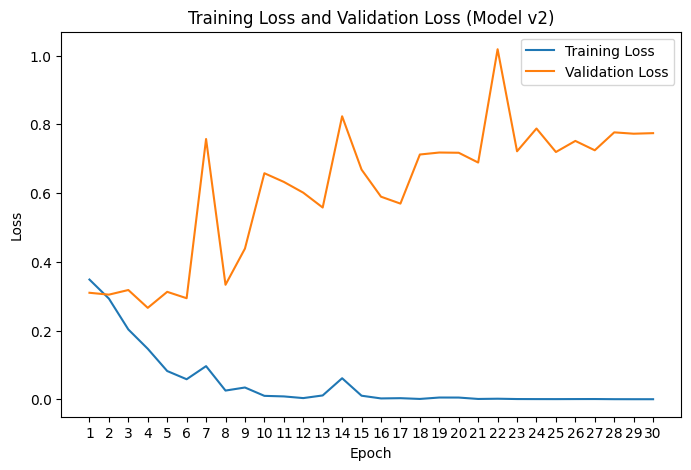

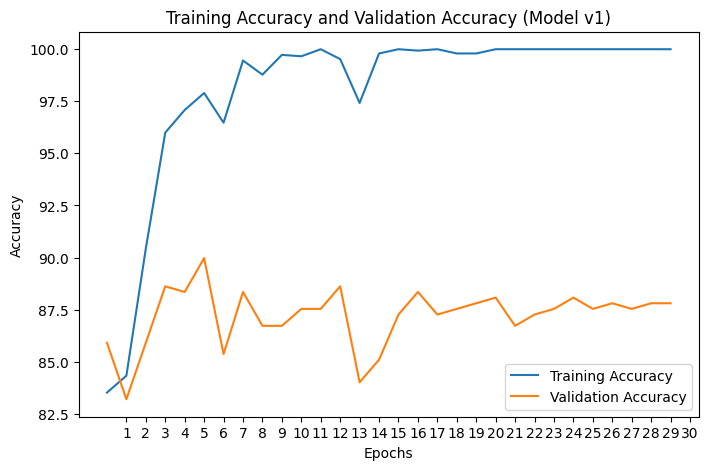

In [ ]:
# Training loss and validation loss over the number of epochs graph
plt.figure(figsize=(8,5))
x_axis = range(1, epoch_n + 1)
plt.plot(x_axis, training_loss, label='Training Loss')
plt.plot(x_axis, validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss and Validation Loss (Model v2)')
plt.xticks(x_axis, range(1, epoch_n + 1))
plt.legend()
plt.show()

print()

# Training accuracy and validation accuracy over the number of epochs graph
plt.figure(figsize=(8,5))
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy and Validation Accuracy (Model v1)')
plt.xticks(x_axis, range(1, epoch_n + 1))
plt.legend()
plt.show()

## [3.5] Test

### [3.5.1] Test Results

**Batch 1**

In [ ]:
# Compute testing loss and accuracy (model v2)
avg_loss, accuracy  = compute_accuracy(model, aug_test_loader)
print("Model v2 (Batch 1)")
print("Testing Loss: ", avg_loss)
print("Testing Accuracy: ", accuracy)

Model v2 (Batch 1)
Testing Loss:  1.2164485678076744
Testing Accuracy:  85.90021691973969


In [ ]:
# Compute accuracy for each class (model v2)
accuracy_good_seeds, accuracy_bad_seeds = compute_accuracy_by_class(model, aug_test_loader)
print("Accuracy (Good Seed): ", accuracy_good_seeds)
print("Accuracy (Bad Seed): ", accuracy_bad_seeds)

Accuracy (Good Seed):  95.33527696793003
Accuracy (Bad Seed):  58.47457627118644


**Batch 2**

In [ ]:
# Compute testing loss and accuracy for batch 2 (model v2)
avg_loss_batch2 , accuracy_batch2  = compute_accuracy(model, batch2_loader)
print("Model v2 (Batch 2)")
print("Testing Loss: ", avg_loss_batch2)
print("Testing Accuracy: ", accuracy_batch2 )

Model v2 (Batch 2)
Testing Loss:  11.870528348286946
Testing Accuracy:  50.0


In [ ]:
# Compute accuracy for each class in batch 2 (model v2)
accuracy_good_seeds_batch2, accuracy_bad_seeds_batch2 = compute_accuracy_by_class(model, batch2_loader)
print("Accuracy (Good Seed): ", accuracy_good_seeds_batch2 )
print("Accuracy (Bad Seed): ", accuracy_bad_seeds_batch2 )

Accuracy (Good Seed):  100.0
Accuracy (Bad Seed):  0.0


**Batch 3**

In [ ]:
# Compute testing loss and accuracy for batch 3 (model v2)
avg_loss_batch3 , accuracy_batch3  = compute_accuracy(model, batch3_loader)
print("Model v2 (Batch 3)")
print("Testing Loss: ", avg_loss_batch3)
print("Testing Accuracy: ", accuracy_batch3 )

Model v2 (Batch 3)
Testing Loss:  10.661073734885768
Testing Accuracy:  50.5008347245409


In [ ]:
# Compute accuracy for each class in batch 3 (model v2)
accuracy_good_seeds_batch3, accuracy_bad_seeds_batch3 = compute_accuracy_by_class(model, batch3_loader)
print("Accuracy (Good Seed): ", accuracy_good_seeds_batch3 )
print("Accuracy (Bad Seed): ", accuracy_bad_seeds_batch3 )

Accuracy (Good Seed):  100.0
Accuracy (Bad Seed):  0.0


**Average result**

In [ ]:
# Calculate the total loss and accuracy
total_loss = avg_loss + avg_loss_batch2 + avg_loss_batch3
total_accuracy = accuracy + accuracy_batch2 + accuracy_batch3

# Calculate the average loss and accuracy
avg_testing_loss = total_loss / 3
avg_testing_accuracy = total_accuracy / 3

# Print the average test results
print("Average Testing Loss (Model v2): ", avg_testing_loss)
print("Average Testing Accuracy (Model v2): ", avg_testing_accuracy)

Average Testing Loss (Model v2):  7.91601688366013
Average Testing Accuracy (Model v2):  62.13368388142687


In [ ]:
# Calculate the average accuracy
avg_bad = (accuracy_bad_seeds + accuracy_bad_seeds_batch2 + accuracy_bad_seeds_batch3) / 3
avg_good = (accuracy_good_seeds + accuracy_good_seeds_batch2 + accuracy_good_seeds_batch3) / 3

# Print the average accuracy
print("Average Accuracy (Good Seed): ", avg_bad)
print("Average Accuracy (Bad Seed): ", avg_good)

Average Accuracy (Good Seed):  19.491525423728813
Average Accuracy (Bad Seed):  98.44509232264335


### [3.5.2] Output Metrics

**Batch 1**

In [ ]:
# Initialize variables
TruePositives = 0
TrueNegatives = 0
FalsePositives = 0
FalseNegatives = 0

# Set the model to evaluation mode
model.eval()

# Loop through the test dataset and use the trained model to make predictions
with torch.no_grad():
    for data in aug_test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        for i in range(len(predicted)):
            if predicted[i] == labels[i] == 1:
                TruePositives += 1
            elif predicted[i] == labels[i] == 0:
                TrueNegatives += 1
            elif predicted[i] != labels[i] and predicted[i] == 1:
                FalsePositives += 1
            elif predicted[i] != labels[i] and predicted[i] == 0:
                FalseNegatives += 1

# Calculate precision, recall, f1 score, and accuracy
if TruePositives + FalsePositives == 0:
    precision = 0
else:
    precision = TruePositives / (TruePositives + FalsePositives)

if TruePositives + FalseNegatives == 0:
    recall = 0
else:
    recall = TruePositives / (TruePositives + FalseNegatives)

if precision + recall == 0:
    f1_score = 0
else:
    f1_score = 2 * (precision * recall) / (precision + recall)

accuracy = (TruePositives + TrueNegatives) / (TruePositives + TrueNegatives + FalsePositives + FalseNegatives)

# Save the output metrics to a CSV file using Pandas
output_metrics = pd.DataFrame({'Precision': [precision],
                               'Recall': [recall],
                               'F1-score': [f1_score],
                               'Accuracy': [accuracy]})

print(f'Precision: {precision:.6f}')
print(f'Recall: {recall:.6f}')
print(f'F1-score: {f1_score:.6f}')
print(f'Accuracy: {accuracy:.6f}')

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Precision: 0.869681
Recall: 0.953353
F1-score: 0.909597
Accuracy: 0.859002


**Batch 2**

In [ ]:
# Initialize variables
TruePositives = 0
TrueNegatives = 0
FalsePositives = 0
FalseNegatives = 0

# Set the model to evaluation mode
model.eval()

# Loop through the test dataset and use the trained model to make predictions
with torch.no_grad():
    for data in batch2_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        for i in range(len(predicted)):
            if predicted[i] == labels[i] == 1:
                TruePositives += 1
            elif predicted[i] == labels[i] == 0:
                TrueNegatives += 1
            elif predicted[i] != labels[i] and predicted[i] == 1:
                FalsePositives += 1
            elif predicted[i] != labels[i] and predicted[i] == 0:
                FalseNegatives += 1

# Calculate precision, recall, f1 score, and accuracy
precision = TruePositives / (TruePositives + FalsePositives)
recall = TruePositives / (TruePositives + FalseNegatives)
f1_score = 2 * (precision * recall) / (precision + recall)
accuracy = (TruePositives + TrueNegatives) / (TruePositives + TrueNegatives + FalsePositives + FalseNegatives)

# Save the output metrics to a CSV file using Pandas
output_metrics = pd.DataFrame({'Precision': [precision],
                               'Recall': [recall],
                               'F1-score': [f1_score],
                               'Accuracy': [accuracy]})

print(f'Precision (Batch 2): {precision:.6f}')
print(f'Recall (Batch 2): {recall:.6f}')
print(f'F1-score (Batch 2): {f1_score:.6f}')
print(f'Accuracy (Batch 2): {accuracy:.6f}')

Precision (Batch 2): 0.500000
Recall (Batch 2): 1.000000
F1-score (Batch 2): 0.666667
Accuracy (Batch 2): 0.500000


**Batch 3**

In [ ]:
# Initialize variables
TruePositives = 0
TrueNegatives = 0
FalsePositives = 0
FalseNegatives = 0

# Set the model to evaluation mode
model.eval()

# Loop through the test dataset and use the trained model to make predictions
with torch.no_grad():
    for data in batch3_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        for i in range(len(predicted)):
            if predicted[i] == labels[i] == 1:
                TruePositives += 1
            elif predicted[i] == labels[i] == 0:
                TrueNegatives += 1
            elif predicted[i] != labels[i] and predicted[i] == 1:
                FalsePositives += 1
            elif predicted[i] != labels[i] and predicted[i] == 0:
                FalseNegatives += 1

# Calculate precision, recall, f1 score, and accuracy
precision = TruePositives / (TruePositives + FalsePositives)
recall = TruePositives / (TruePositives + FalseNegatives)
f1_score = 2 * (precision * recall) / (precision + recall)
accuracy = (TruePositives + TrueNegatives) / (TruePositives + TrueNegatives + FalsePositives + FalseNegatives)

# Save the output metrics to a CSV file using Pandas
output_metrics = pd.DataFrame({'Precision': [precision],
                               'Recall': [recall],
                               'F1-score': [f1_score],
                               'Accuracy': [accuracy]})

print(f'Precision (Batch 3): {precision:.6f}')
print(f'Recall (Batch 3): {recall:.6f}')
print(f'F1-score (Batch 3): {f1_score:.6f}')
print(f'Accuracy (Batch 3): {accuracy:.6f}')

Precision (Batch 3): 0.505008
Recall (Batch 3): 1.000000
F1-score (Batch 3): 0.671104
Accuracy (Batch 3): 0.505008


## [3.6] Load Saved Model

In [ ]:
# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model
PATH = "/content/drive/My Drive/G6_COMP3029/Model/modelv2.pt"
modelv2 = torch.load(PATH, map_location=device)
print(modelv2)

CNN_Model(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_

## [3.7] Data Visualisation

### [3.7.1] Initialisation

In [ ]:
model_weights = [] # to save the conv layer weights in this list
conv_layers = [] # to save the 49 conv layers in this list

# Get all the model children as a list
counter = 0
model_children_1 = list(modelv2.backbone.children())
for i in range(len(model_children_1)):
    if type(model_children_1[i]) == torch.nn.Conv2d:
        counter += 1
        model_weights.append(model_children_1[i].weight)
        conv_layers.append(model_children_1[i])

    if type(model_children_1[i]) == torch.nn.Sequential:
        model_children_2 = list(model_children_1[i].children())
        for j in range(len(model_children_2)):
            model_children_3 = list(model_children_2[j].children())
            for k in range(len(model_children_3)):
                if type(model_children_3[k]) == torch.nn.Conv2d:
                    counter += 1
                    model_weights.append(model_children_3[k].weight)
                    conv_layers.append(model_children_3[k])


print(f"Total convolutional layers (Model v1): {counter}")
print(conv_layers)

Total convolutional layers (Model v1): 17
[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False), Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False), Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False

### [3.7.2] Visualise Filter

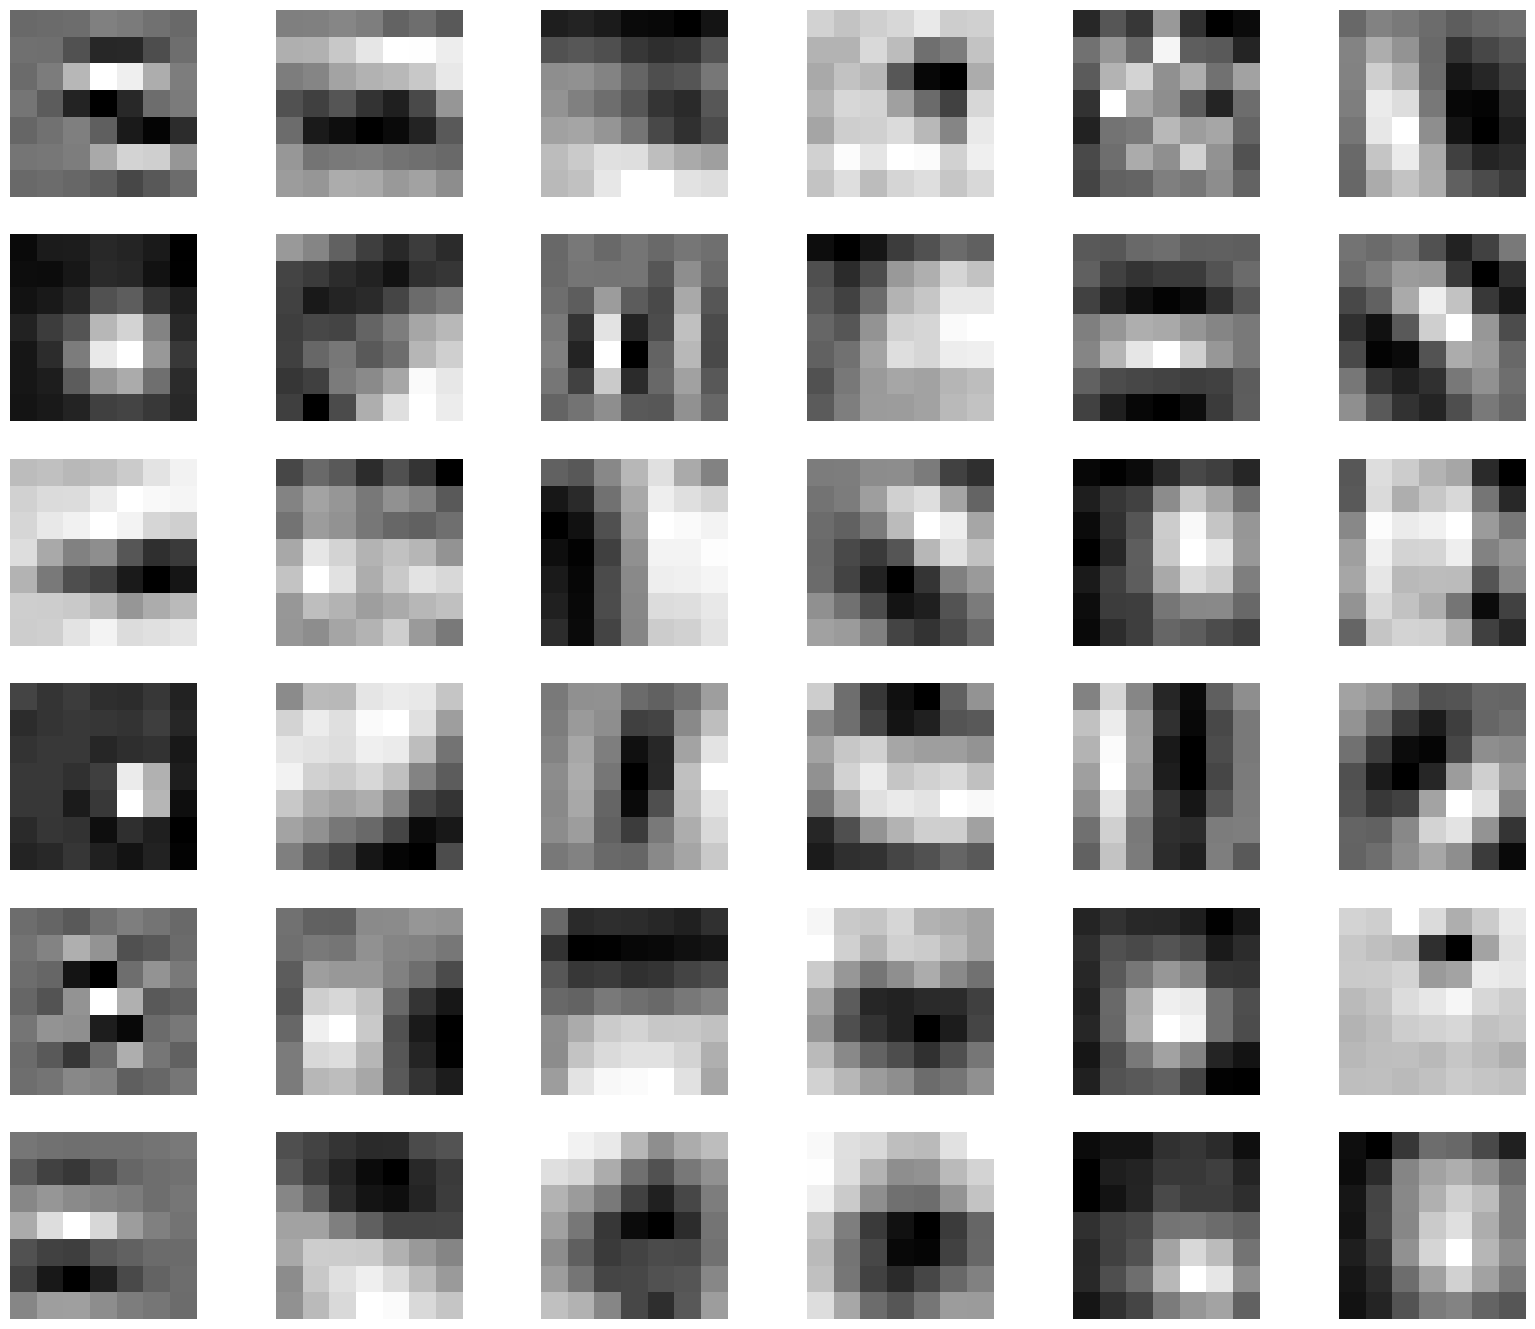

In [ ]:
# Visualize Filters for Model v1
plt.figure(figsize=(20, 17))
for i, filter in enumerate(model_weights[0]):
    if i == 36: # we will visualise only 8x8 blocks from each layer
            break
    plt.subplot(6, 6, i+1) # (8, 8) because in conv0 we have 7x7 filters and total of 64 (see printed shapes)
    plt.imshow(filter[0, :, :].cpu().detach(), cmap='gray')
    plt.axis('off')
plt.show()

### [3.7.3] Feature Mapping

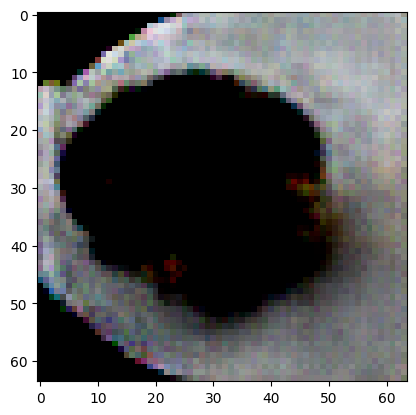

torch.Size([3, 64, 64])
torch.Size([1, 3, 64, 64])


In [ ]:
img = cv2.imread('/content/drive/My Drive/G6_COMP3029/AugmentedDataset/augmented/GoodSeed/batch_43_image_0.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # convert BGR to RGB
seed = img
plt.imshow(img)
plt.show()
transform = transforms.Compose([
    transforms.ToTensor(),
])
img = np.array(img)

# apply the transformations
img = transform(img)
print(img.size())
# unsqueeze to add a batch dimension
img = img.unsqueeze(0)
print(img.size())
img=img.to(device)

In [ ]:
# Pass the image through all the layers
results = [conv_layers[0](img)]
for i in range(1, len(conv_layers)):
    # pass the result from the last layer to the next layer
    results.append(conv_layers[i](results[-1]))

# Make a copy of the `results`
outputs = results

# Visualise 36 features from each layer
for num_layer in range(len(outputs)):
    plt.figure(figsize=(30, 30))
    layer_viz = outputs[num_layer][0, :, :, :]
    layer_viz = layer_viz.data
    print(layer_viz.size())
    for i, filter in enumerate(layer_viz):
        if i == 36: # we will visualise only 8x8 blocks from each layer
            break
        plt.subplot(6, 6, i + 1)
        plt.imshow(filter.cpu(), cmap='gray')
        plt.axis("off")
    print(f"Saving layer {num_layer} feature maps...")

    plt.close()

torch.Size([64, 32, 32])
Saving layer 0 feature maps...
torch.Size([64, 32, 32])
Saving layer 1 feature maps...
torch.Size([64, 32, 32])
Saving layer 2 feature maps...
torch.Size([64, 32, 32])
Saving layer 3 feature maps...
torch.Size([64, 32, 32])
Saving layer 4 feature maps...
torch.Size([128, 16, 16])
Saving layer 5 feature maps...
torch.Size([128, 16, 16])
Saving layer 6 feature maps...
torch.Size([128, 16, 16])
Saving layer 7 feature maps...
torch.Size([128, 16, 16])
Saving layer 8 feature maps...
torch.Size([256, 8, 8])
Saving layer 9 feature maps...
torch.Size([256, 8, 8])
Saving layer 10 feature maps...
torch.Size([256, 8, 8])
Saving layer 11 feature maps...
torch.Size([256, 8, 8])
Saving layer 12 feature maps...
torch.Size([512, 4, 4])
Saving layer 13 feature maps...
torch.Size([512, 4, 4])
Saving layer 14 feature maps...
torch.Size([512, 4, 4])
Saving layer 15 feature maps...
torch.Size([512, 4, 4])
Saving layer 16 feature maps...


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

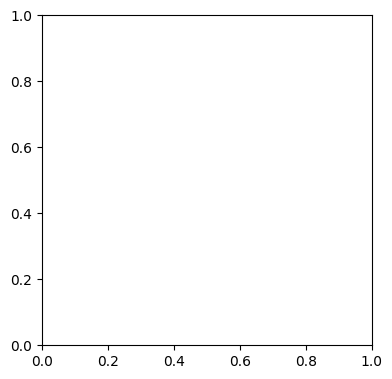

In [ ]:
# Visualise 36 features from each layer
def display_layer(num_layer):
    plt.figure(figsize=(30, 30))
    layer_viz = outputs[num_layer][0, :, :, :]
    layer_viz = layer_viz.data
    for i, filter in enumerate(layer_viz):
        if i == 36: # we will visualise only 8x8 blocks from each layer
            break
        plt.subplot(6, 6, i + 1)
        plt.imshow(filter, cmap='gray')
        plt.axis("off")

    plt.show()
    plt.close()

# Display feature maps of a specific layer (e.g., layer 3)
display_layer(16) # can only run on CPU (not GPU)

### [3.7.4] Saliency Map

In [ ]:
# Preprocess the image
def preprocess(image, size=64):
    transform = transforms.Compose([
        transforms.ToPILImage(mode=None),
        transforms.Resize((size,size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        transforms.Lambda(lambda x: x[None]),
    ])
    return transform(image)

def deprocess(image):
    transform = transforms.Compose([
        transforms.Lambda(lambda x: x[0]),
        transforms.Normalize(mean=[0, 0, 0], std=[4.3668, 4.4643, 4.4444]),
        transforms.Normalize(mean=[-0.485, -0.456, -0.406], std=[1, 1, 1]),
        transforms.ToPILImage(),
    ])
    return transform(image)

def show_img(PIL_IMG):
    plt.imshow(np.asarray(PIL_IMG))

# Saliency Map for Model v1
def saliency_map(img):

    X = preprocess(img)
    model.eval()
    X.requires_grad_()
    scores = model(X.to(device))
    score_max_index = scores.argmax()
    score_max = scores[0,score_max_index]
    score_max.backward()
    saliency, _ = torch.max(X.grad.data.abs(),dim=1)

    plt.figure(figsize=(10,15))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(saliency[0], cmap=plt.cm.hot)
    plt.axis("off")
    plt.show()

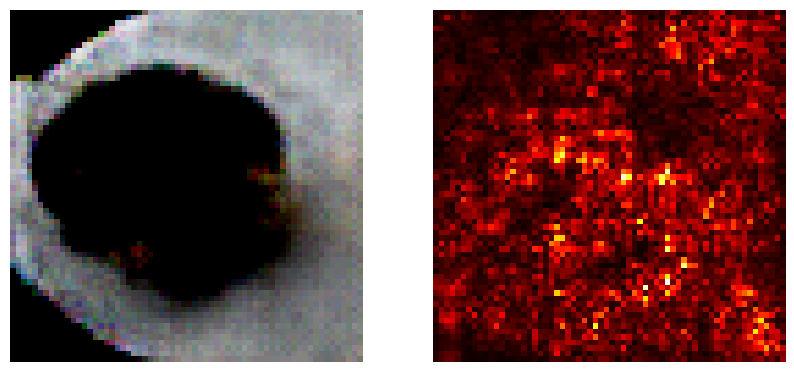

In [ ]:
# Saliency map for good seed in train folder
img = cv2.imread('/content/drive/My Drive/G6_COMP3029/AugmentedDataset/augmented/GoodSeed/batch_43_image_0.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # convert BGR to RGB
seed = img
saliency_map(seed)

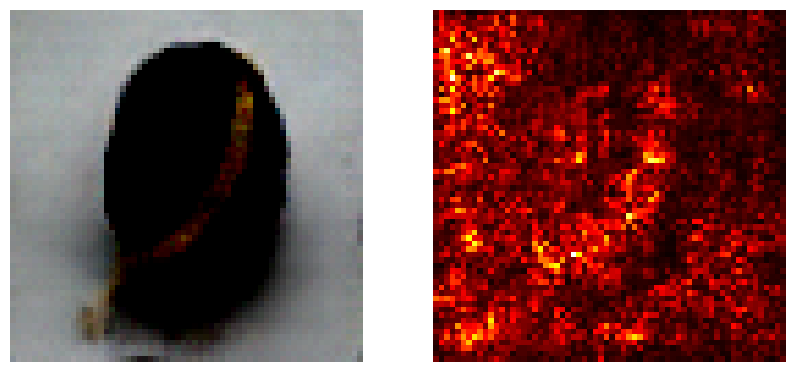

In [ ]:
# Saliency map for good seed in test folder
img = cv2.imread('/content/drive/My Drive/G6_COMP3029/AugmentedDataset/augmented/GoodSeed/seed_999_image_0.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # convert BGR to RGB
seed = img
saliency_map(seed)

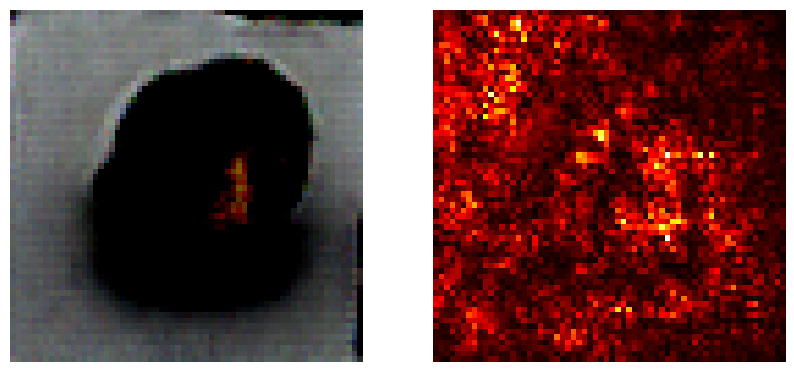

In [ ]:
# Saliency map for bad seed in train folder
img = cv2.imread('/content/drive/My Drive/G6_COMP3029/AugmentedDataset/augmented/BadSeed/batch_41_image_10.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # convert BGR to RGB
seed = img
saliency_map(seed)

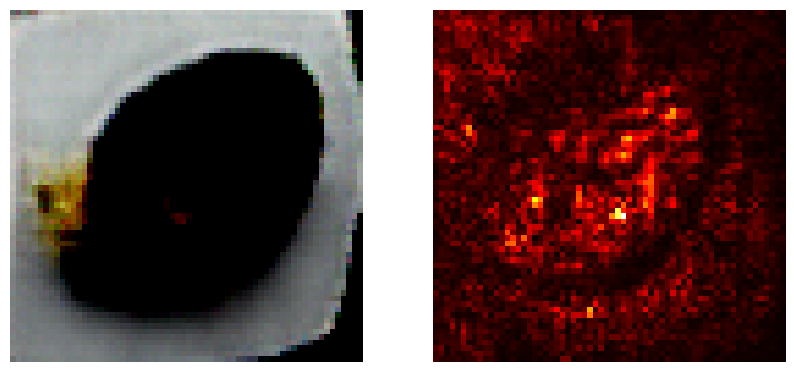

In [ ]:
# Saliency map for bad seed in test folder
img = cv2.imread('/content/drive/My Drive/G6_COMP3029/AugmentedDataset/augmented/BadSeed/seed_999_image_42.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # convert BGR to RGB
seed = img
saliency_map(seed)

### [3.7.5] Visualise Wrongly Classified Images

**Finding & Storing Misclassified**

In [ ]:
misclassified_indices = []
misclassified_images = []
misclassified_labels = []
misclassified_predictions = []

with torch.no_grad():
    for i, data in enumerate(aug_test_loader):
        images, labels = data[0].to(device), data[1].to(device)
        outputs = modelv2(images)
        _, predicted = torch.max(outputs.data, 1)

        for j in range(len(predicted)):
            if predicted[j] != labels[j]:
                misclassified_indices.append(i * aug_test_loader.batch_size + j)
                misclassified_images.append(images[j].cpu().numpy())
                misclassified_labels.append(labels[j].cpu().item())
                misclassified_predictions.append(predicted[j].cpu().item())

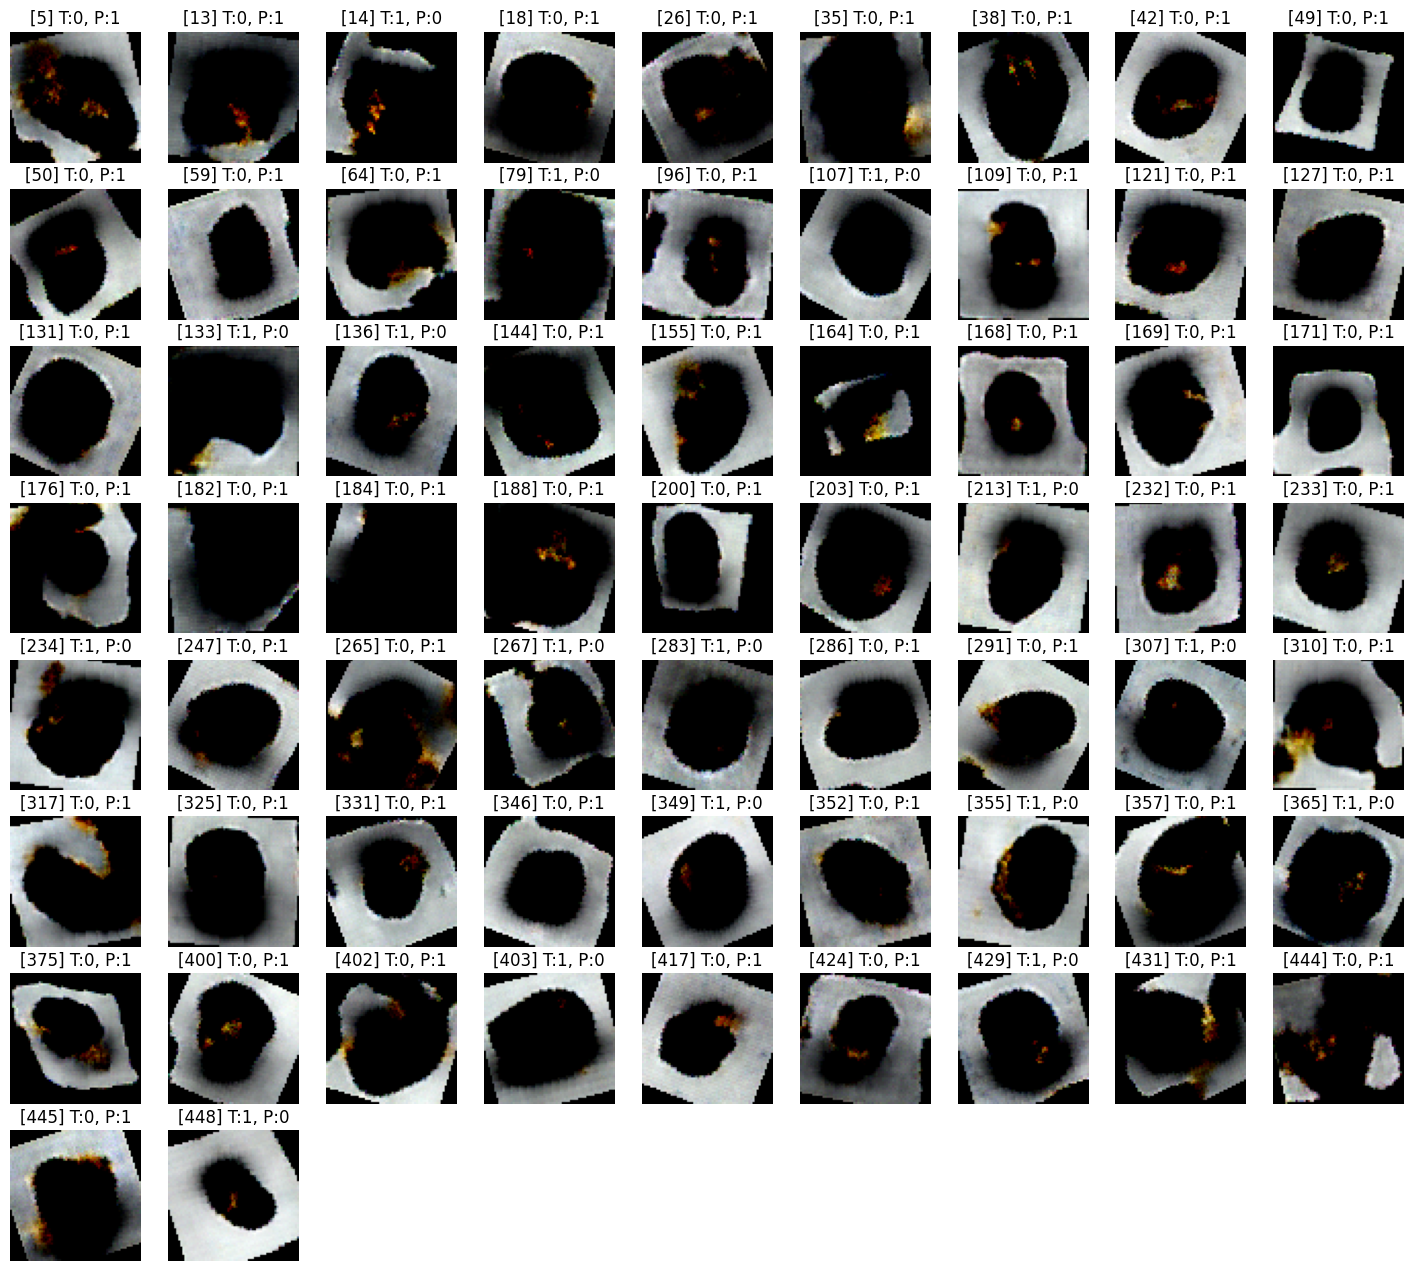

In [ ]:
# Display all mislabelled images, their truth value, and the prediction
# Calculate the grid size
num_images = len(misclassified_images)
num_rows = math.ceil(math.sqrt(num_images))
num_cols = num_rows

# Create a new figure with the calculated size
fig = plt.figure(figsize=(num_rows*2, num_cols*2))

# Loop through all misclassified images and display them in the grid
for i in range(num_images):
    ax = fig.add_subplot(num_rows, num_cols, i+1)
    img = misclassified_images[i].transpose((1, 2, 0))

    # Normalise the image
    img = (img - img.min()) / (img.max() - img.min())
    ax.imshow(img)
    ax.set_title(f"[{misclassified_indices[i]}] T:{misclassified_labels[i]}, P:{misclassified_predictions[i]}")
    ax.axis('off')

plt.show()

**Visualise Last Layer of Feature Map**

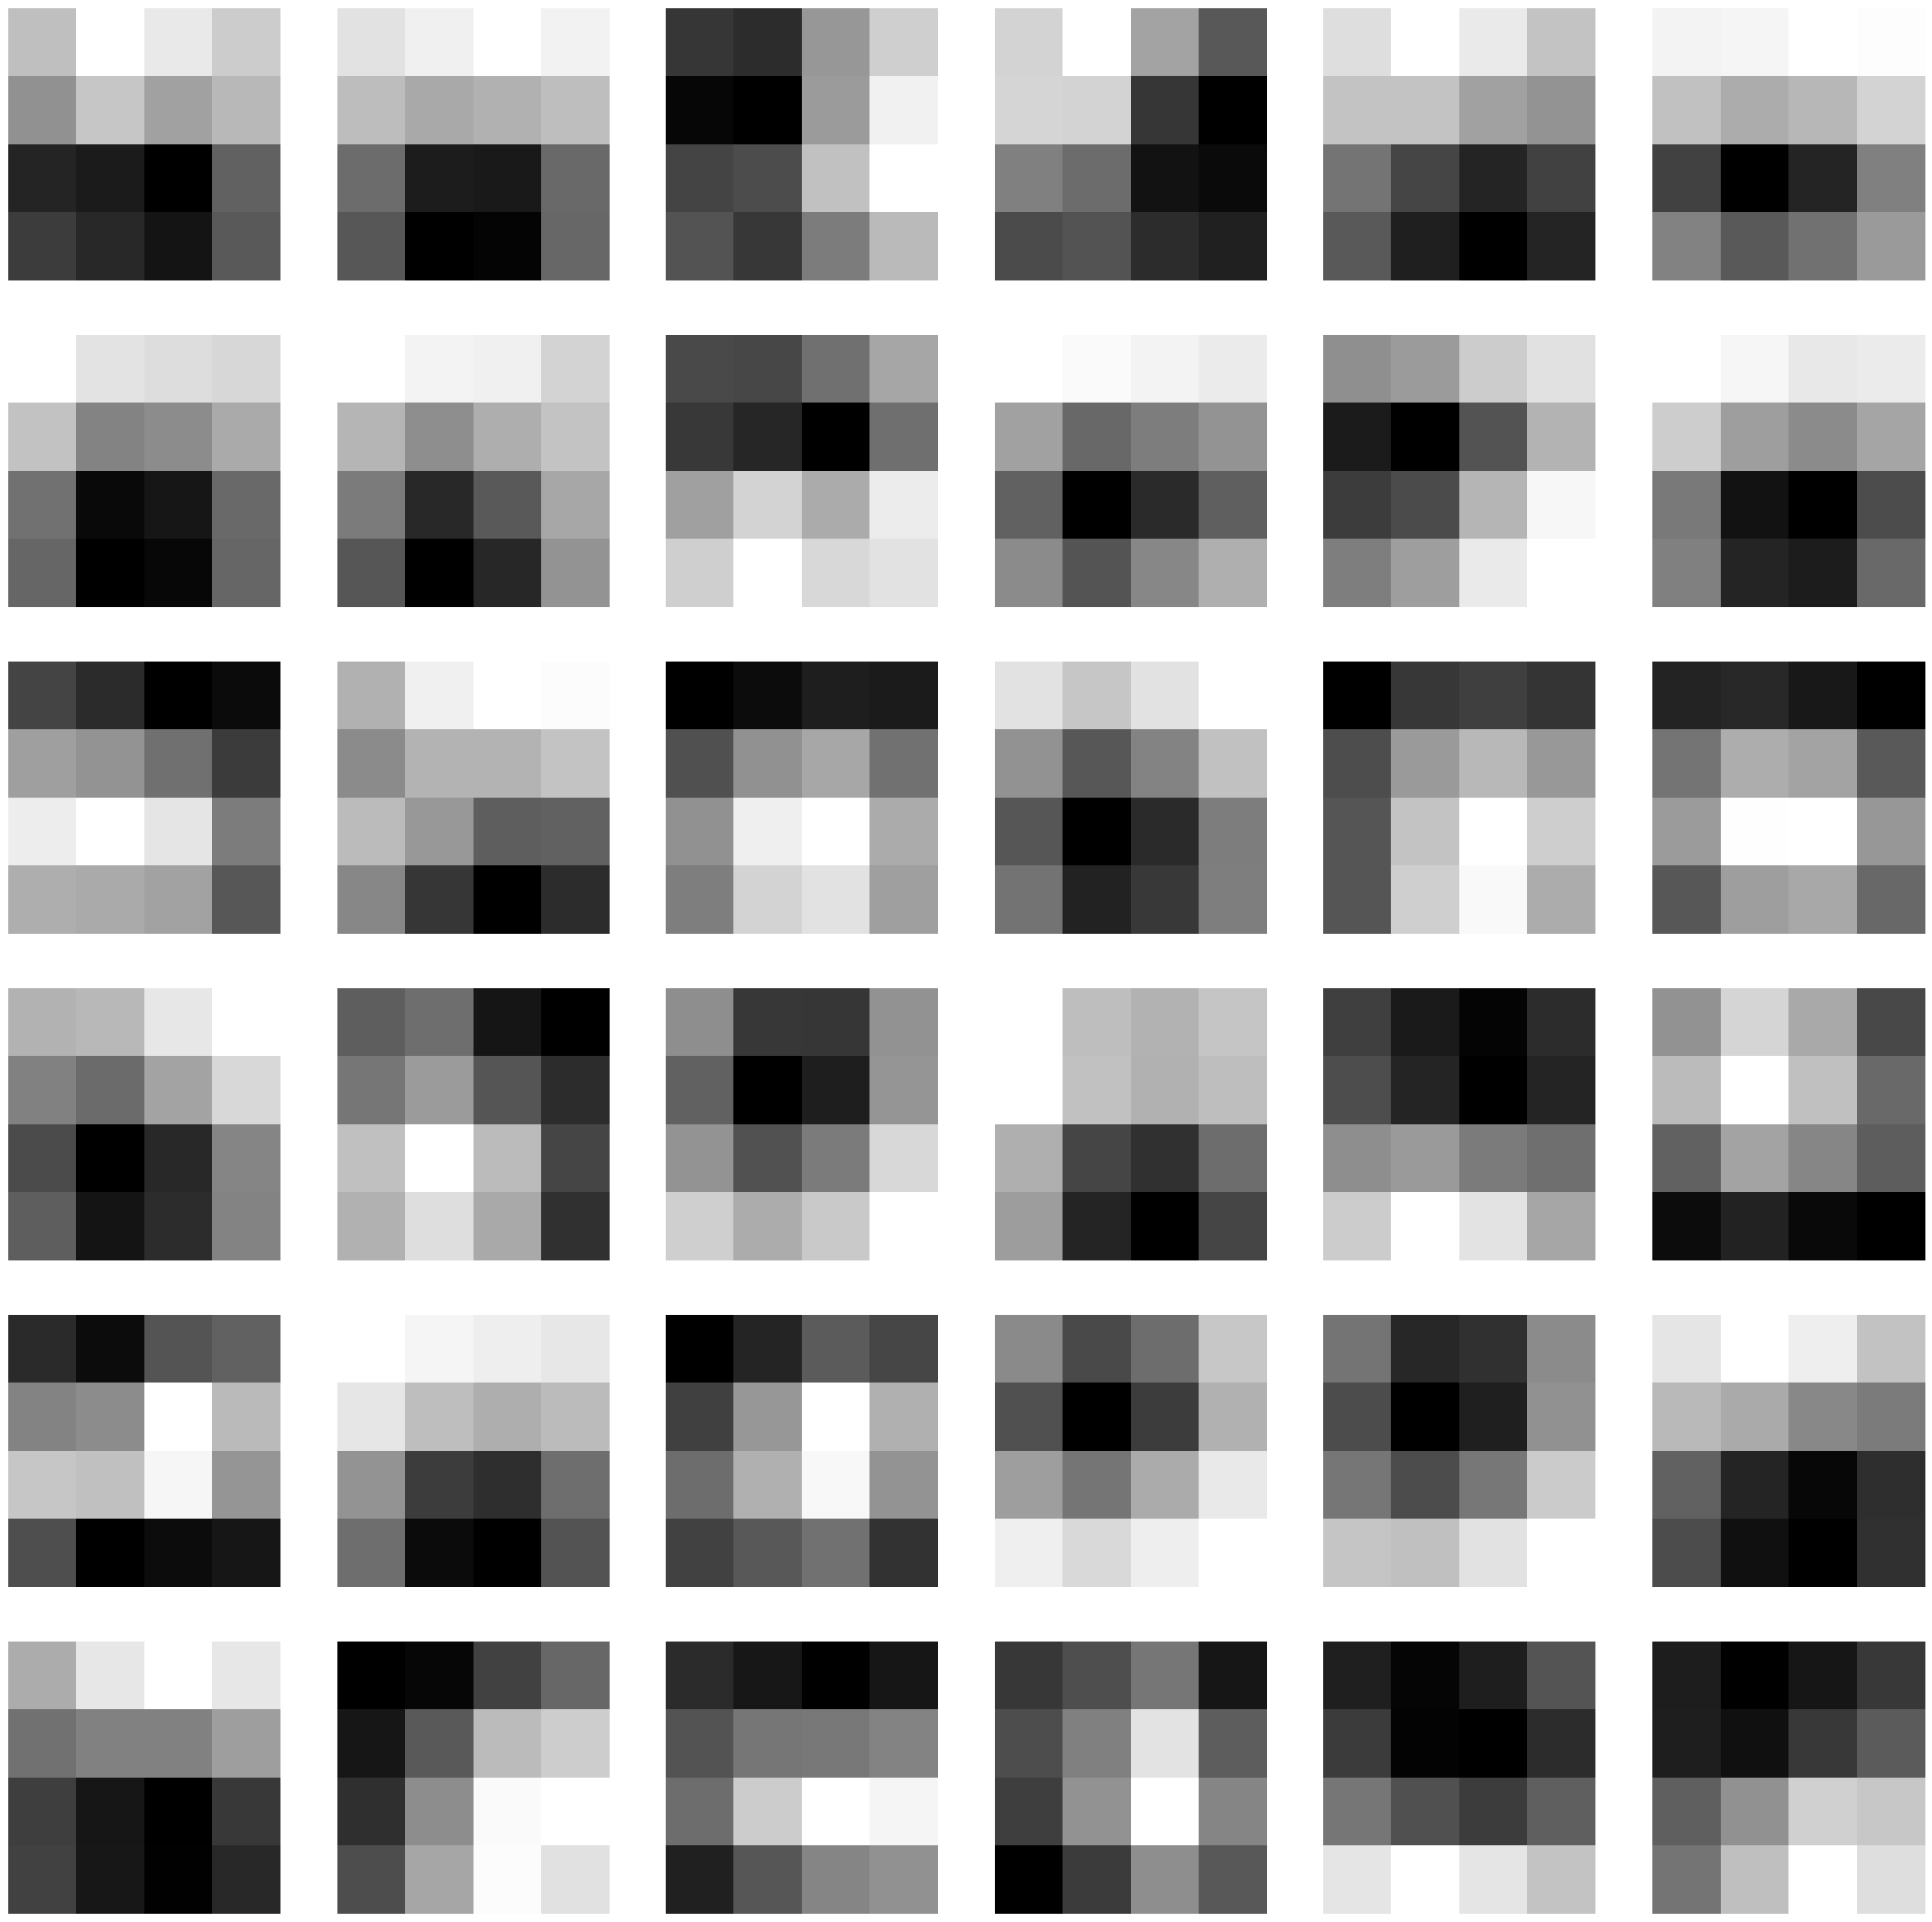

In [ ]:
def display_layer(num_layer, img):
    # Pass the image through all the layers up to the selected layer
    layer_output = img
    for i in range(num_layer + 1):
        layer_output = conv_layers[i](layer_output)

    # Get the feature maps from the selected layer
    layer_viz = layer_output[0, :, :, :].data

    # Calculate the number of rows and columns needed to display the feature maps
    num_maps = layer_viz.shape[0]
    num_rows = int(np.ceil(np.sqrt(num_maps)))
    num_cols = num_rows

    # Visualize the feature maps
    plt.figure(figsize=(30, 30))
    for i, feature_map in enumerate(layer_viz):
        if i == 36: # we will visualize only 8x8 blocks from each layer
            break
        plt.subplot(6, 6, i + 1)
        plt.imshow(feature_map.cpu(), cmap='gray')
        plt.axis("off")

    #plt.savefig('result/TransferModel/Batch_1/False_layer{}_image{}.png'.format(layer_index,image_index))
    plt.show()
    plt.close()

image_index = 15  # index of mislabelled image
layer_index = 16 # index of last conv layer
transform = transforms.Compose([
    transforms.ToTensor(),
])
# Transform the misclassified image to a tensor and unsqueeze to add a batch dimension
misclassified_image = misclassified_images[image_index].transpose((1, 2, 0))
transformed_image = transform(misclassified_image)
transformed_image = transformed_image.unsqueeze(0)
transformed_image = transformed_image.to(device)
display_layer(num_layer=layer_index, img=transformed_image)

**Saliency Map for Wrongly Classified Images**

In [ ]:
# Preprocess the image
def preprocess(image, size=256):
    transform = transforms.Compose([
        transforms.ToPILImage(mode=None),
        transforms.Resize((size,size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        transforms.Lambda(lambda x: x[None]),
    ])
    return transform(image)

def deprocess(image):
    transform = transforms.Compose([
        transforms.Lambda(lambda x: x[0]),
        transforms.Normalize(mean=[0, 0, 0], std=[4.3668, 4.4643, 4.4444]),
        transforms.Normalize(mean=[-0.485, -0.456, -0.406], std=[1, 1, 1]),
        transforms.ToPILImage(),
    ])
    return transform(image)

def show_img(PIL_IMG):
    plt.imshow(np.asarray(PIL_IMG))

def saliency_map(img,image_index):

    # preprocess the image
    X = preprocess(img)

    # we would run the model in evaluation mode
    model.eval()

    # we need to find the gradient with respect to the input image, so we need to call requires_grad_ on it
    X.requires_grad_()
    scores = model(X.to(device))

    # Get the index corresponding to the maximum score and the maximum score itself.
    score_max_index = scores.argmax()
    score_max = scores[0,score_max_index]
    score_max.backward()
    saliency, _ = torch.max(X.grad.data.abs(),dim=1)

    # code to plot the saliency map as a heatmap
    # plt.imshow(saliency[0], cmap=plt.cm.hot)
    # plt.axis('off')

    plt.figure(figsize=(10,15))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(saliency[0], cmap=plt.cm.hot)
    plt.axis("off")
    plt.show()

def convert_img(img):
    img = img / 2 + 0.5     # unnormalize
    img = np.transpose(img, (1, 2, 0))
    norm_image = cv2.normalize(img, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    norm_image = norm_image.astype(np.uint8)
    return norm_image

T:1, P:0


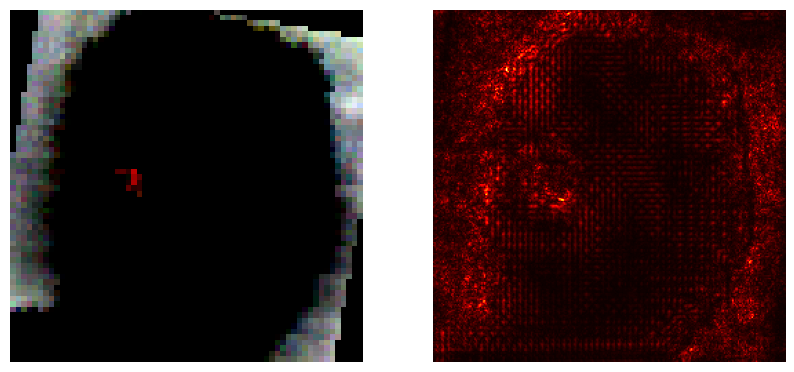

In [ ]:
image_index = 12  # Change this value to display a different mislabelled image
seed = convert_img(misclassified_images[image_index])

print(f"T:{misclassified_labels[image_index]}, P:{misclassified_predictions[image_index]}")
saliency_map(seed,image_index)

T:0, P:1


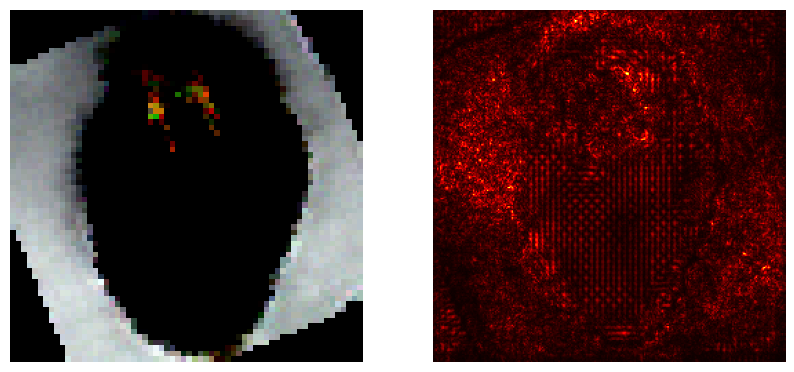

In [ ]:
image_index = 6  # Change this value to display a different mislabelled image
seed = convert_img(misclassified_images[image_index])

print(f"T:{misclassified_labels[image_index]}, P:{misclassified_predictions[image_index]}")
saliency_map(seed,image_index)